#O conteúdo deste tema foi elaborado com base no curso: Séries Temporais e Analises Preditivas com Python. Domine a Ciência de Prever o Futuro com Técnicas Estatísticas e de Machine Learning usando Python, Keras, Pytorch e Mais

#Criado por , Fernando Amaral, Minerva Singh,
#Disponível em: https://www.udemy.com/course/series-temporais-com-python/?couponCode=MT300725G1

### Definição: Séries temporais são conjuntos de dados observados ao longo do tempo, organizados em sequência cronológica.

* Intervalos:
  * Milesegundos, hora, dia, semana,mes, ano, etc.

* Na Ordem ou Sequencia existe uma dependência.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [ ]:
df = pd.read_excel('AirPassengers.xlsx', index_col="Month")
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
#Terremotos na itália
df1 = pd.read_excel('italy_earthquakes_from_2016-08-24_to_2016-11-30.xlsx')
df1

,Time,Latitude,Longitude,Depth/Km,Magnitude
0,2016-08-24 03:36:32.000,426983.0,132335,2025-01-08 00:00:00,6.0
1,2016-08-24 03:37:26.580,427123.0,132533,9.0,2025-05-04 00:00:00
2,2016-08-24 03:40:46.590,427647.0,131723,2025-07-09 00:00:00,2025-08-03 00:00:00
3,2016-08-24 03:41:38.900,427803.0,131683,2025-07-09 00:00:00,2025-09-03 00:00:00
4,2016-08-24 03:42:07.170,427798.0,131575,2025-07-09 00:00:00,2025-06-03 00:00:00
...,...,...,...,...,...
8081,2016-11-30 18:39:27.600,428903.0,130197,2025-07-10 00:00:00,2.0
8082,2016-11-30 18:43:14.850,429443.0,132003,2025-06-08 00:00:00,2025-06-02 00:00:00
8083,2016-11-30 20:18:27.550,430092.0,131288,8.0,2025-02-02 00:00:00
8084,2016-11-30 20:45:11.780,430197.0,131017,2025-03-09 00:00:00,2025-07-02 00:00:00


#Outros exemplos:
* Cotação da bolda de valores;
* Toneladas de sojas colhidas por mês;
* Evasão escolar anual;
* Índices pluviométricos diários, mensais e/ou anuais.

### Dados que não são séries temporais

In [ ]:
# Criando dados não temporais
x = np.arange(50)
y = 2 * x + 5 + np.random.randn(50) * 10

# Criando o DataFrame
df_nao_temporal = pd.DataFrame({'x': x, 'y': y})

# Exibindo as primeiras linhas do DataFrame
df_nao_temporal.head()

,x,y
0,0,9.158354
1,1,17.571999
2,2,15.153654
3,3,4.672389
4,4,21.980339


In [ ]:
# Criando dados de idade e custo de plano de saúde
np.random.seed(0)
idade = np.random.randint(18, 65, size=50)
custo = 250 + (idade - 18) * 15 + np.random.normal(0, 50, size=50)
custo = np.round(custo, 2)

# Criando o DataFrame
df_plano_saude = pd.DataFrame({'idade': idade, 'custo': custo})

# Exibindo as primeiras linhas do DataFrame
df_plano_saude.head()

,idade,custo
0,62,890.06
1,18,208.64
2,21,274.21
3,21,268.77
4,57,875.66


# Por que usar séries temporais?
  R. Quando se deseja prever o futuro

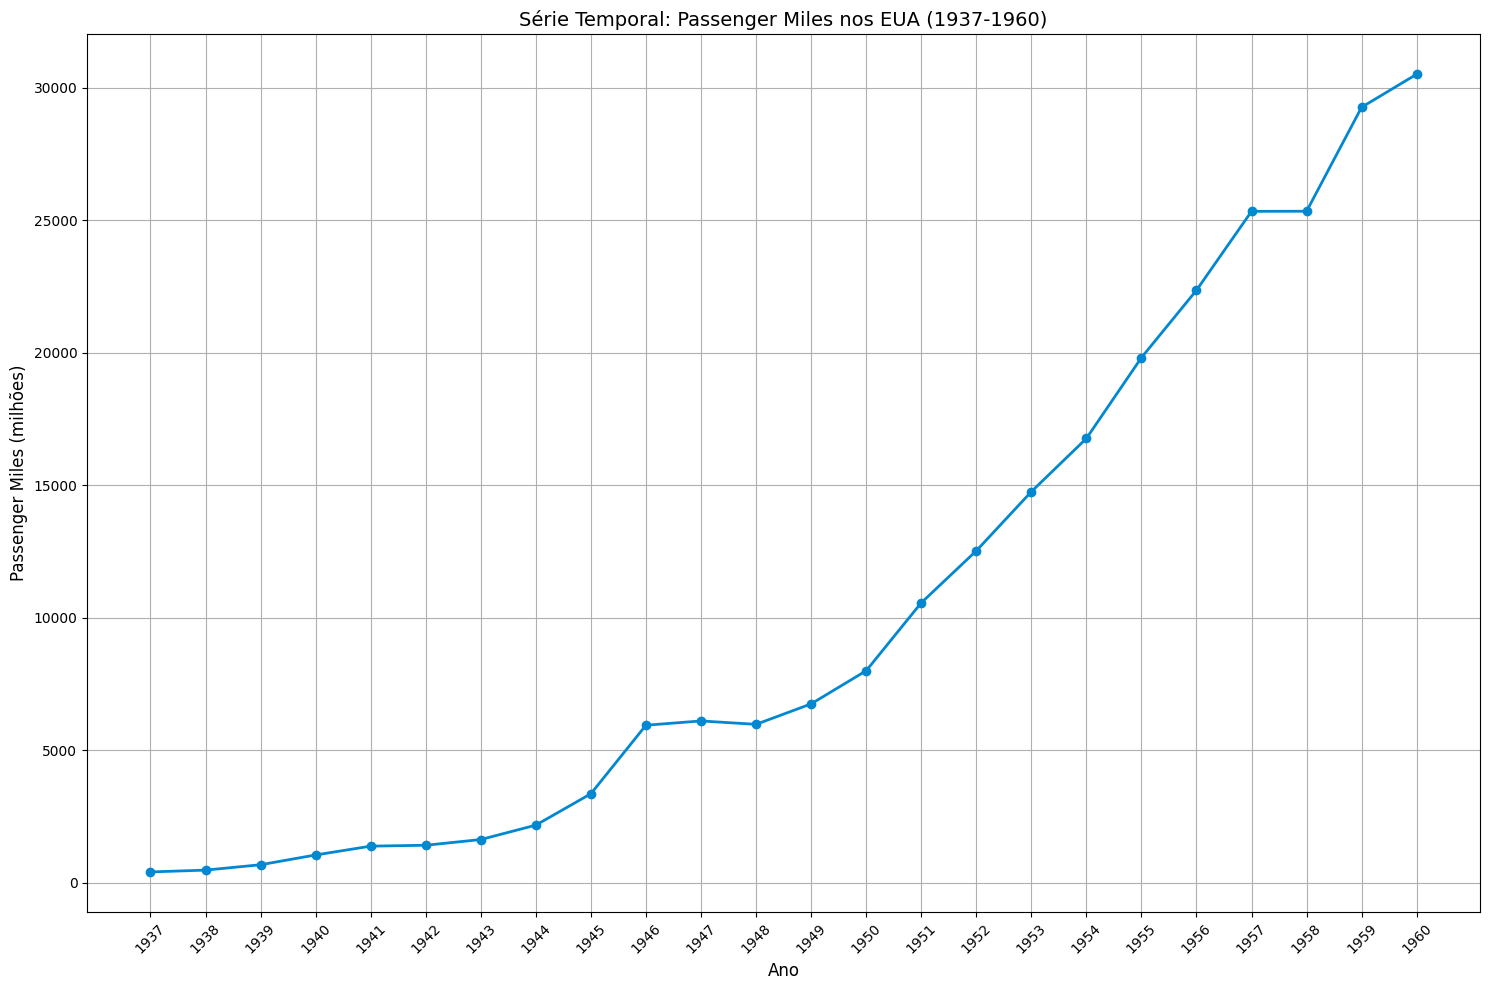

In [ ]:
# Dados do conjunto airmiles (1937-1960)
anos = [1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
        1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
        1957, 1958, 1959, 1960]
airmiles = [412, 480, 683, 1052, 1385, 1418, 1634, 2178, 3362, 5948,
            6109, 5981, 6753, 8003, 10566, 12528, 14760, 16769, 19819,
            22362, 25340, 25343, 29269, 30514]  # Em milhões

# Criar o gráfico
plt.plot(anos, airmiles, marker='o', color='#0288D1', linestyle='-', linewidth=2, markersize=6)
plt.title('Série Temporal: Passenger Miles nos EUA (1937-1960)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Passenger Miles (milhões)', fontsize=12)
plt.grid(True)
plt.xticks(anos, rotation=45)  # Mostrar todos os anos no eixo x
plt.tight_layout()  # Ajustar layout para evitar corte de rótulos
plt.show()

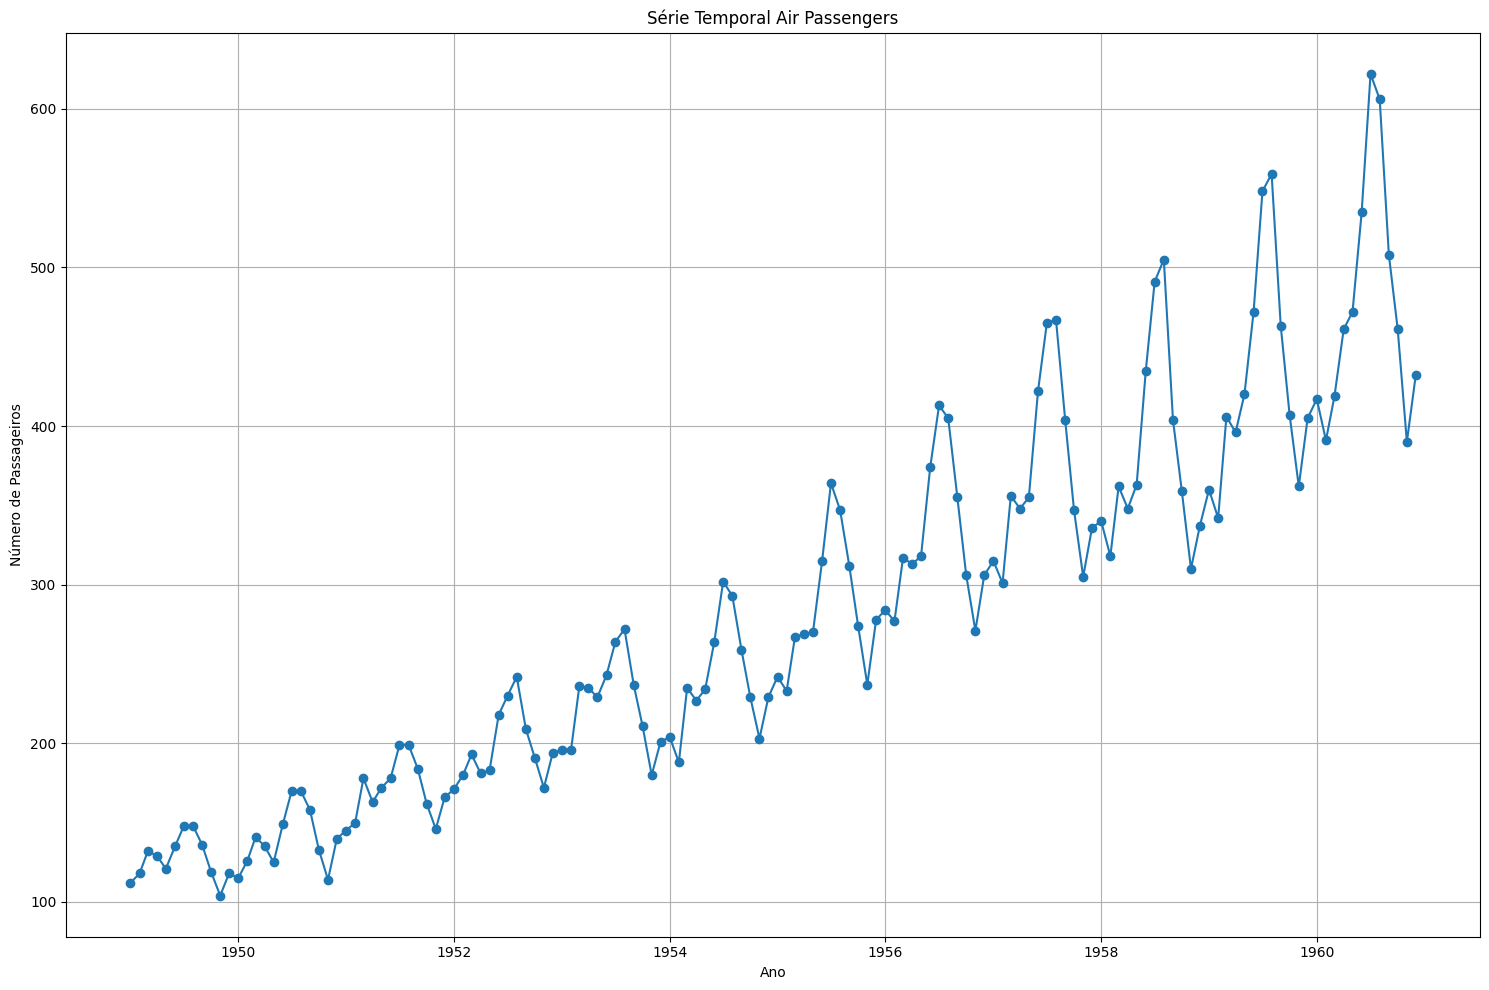

In [ ]:
plt.plot(df.index, df['#Passengers'], marker='o', linestyle='-')
plt.title('Série Temporal Air Passengers')
plt.xlabel('Ano')
plt.ylabel('Número de Passageiros')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df1 = pd.read_csv('precipitacao_mensal.csv', index_col = "Data", parse_dates = True, sep = ";")
df1

,Precipitação
Data,
1956-01-31,"113,7"
1956-02-29,109
1956-03-31,"112,1"
1956-04-30,"188,5"
1956-05-31,"249,6"
...,...
2023-08-31,"144,1"
2023-09-30,"123,3"
2023-10-31,363


In [ ]:
#substituir vírgulas por pontos e converter para float
df1['Precipitação'] = df1['Precipitação'].str.replace(',', '.').astype(float)
df1.head()

,Precipitação
Data,
1956-01-31,113.7
1956-02-29,109.0
1956-03-31,112.1
1956-04-30,188.5
1956-05-31,249.6


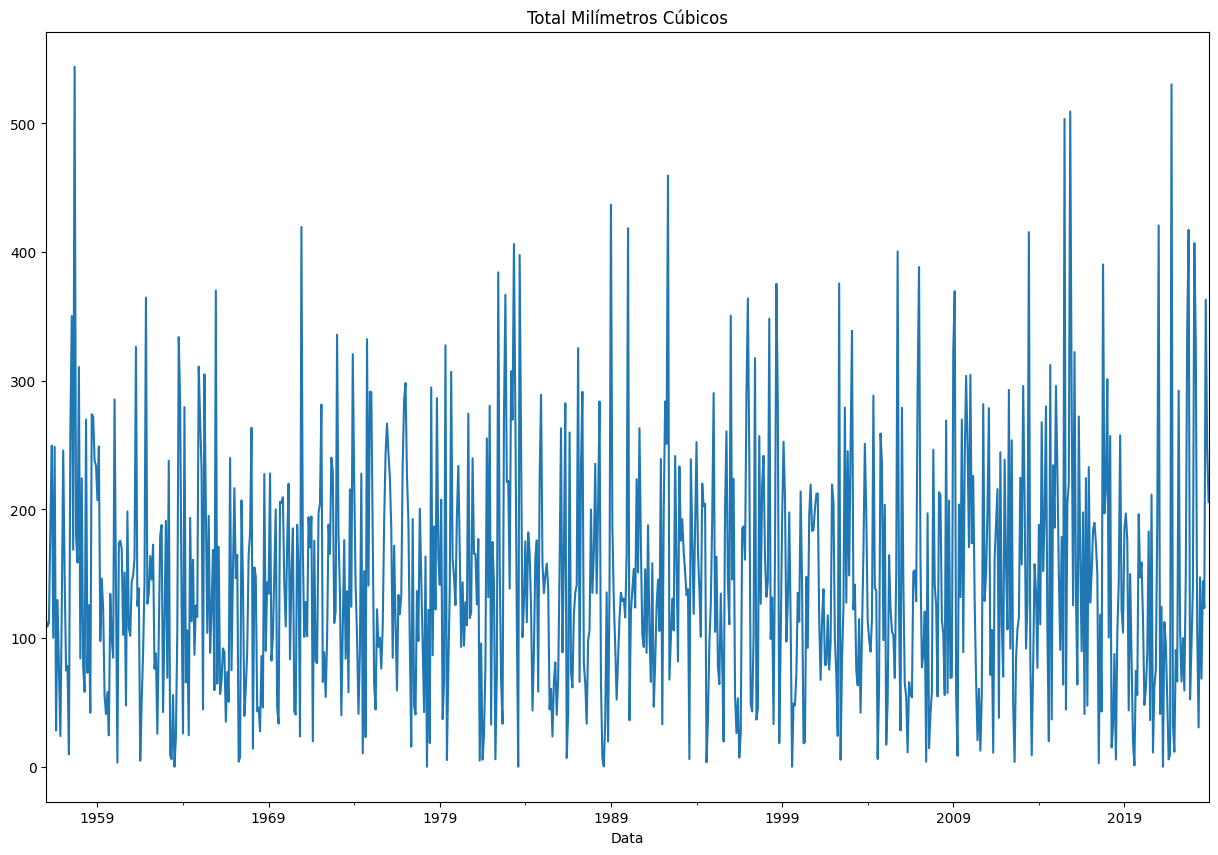

In [ ]:
df1['Precipitação'].plot(title = 'Total Milímetros Cúbicos')
plt.show()

# Componentes de uma Série Temporal

* Tendência - aumento ou redução da série a longo prazo;
* Sazonalidade - padrões que ocorrem em intervalos fixos;
* Ciclo - aumento ou redução de fequência sem intervalos fixos;
* Resíduos (ou erros): A parte aleatória ou não explicada pela tendência e sazonalidade, calculada como:
$$\text{Resíduo}_t = y_t - (\text{Tendência}_t + \text{Sazonalidade}_t)$$, onde $ y_t $ é o valor observado no tempo $ t $.

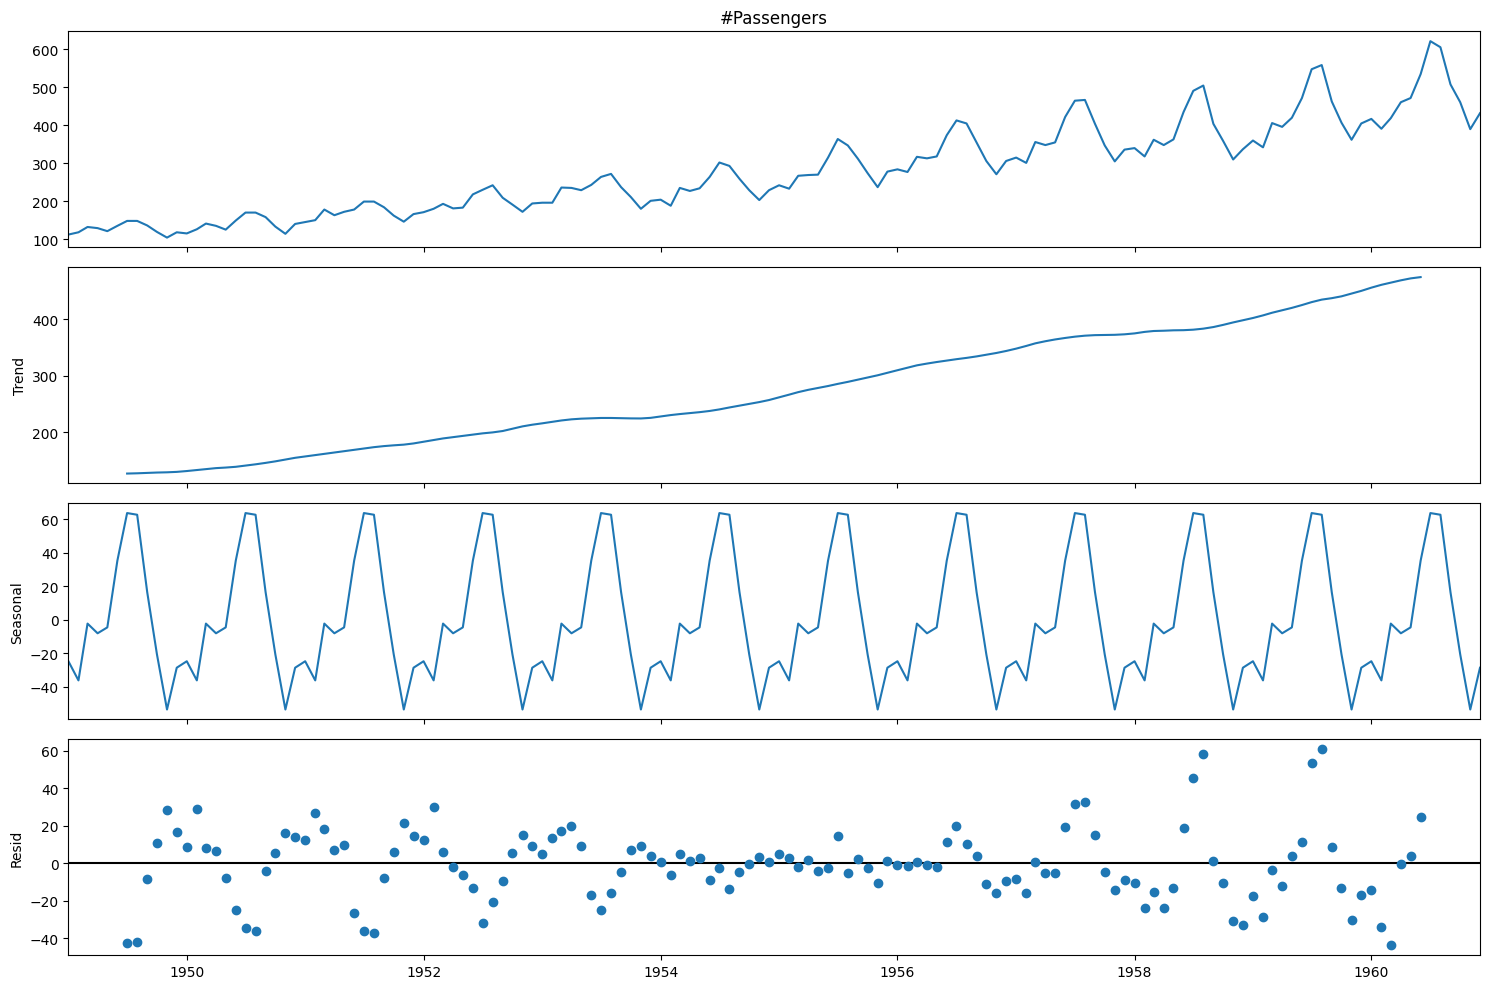

In [ ]:
decomposition = seasonal_decompose(df['#Passengers'],
                                   model='add')


# Plot the decomposed components (trend, seasonal, and residual)
fig = decomposition.plot()
plt.show()

OBS:  Nem toda série terá todos os elementos

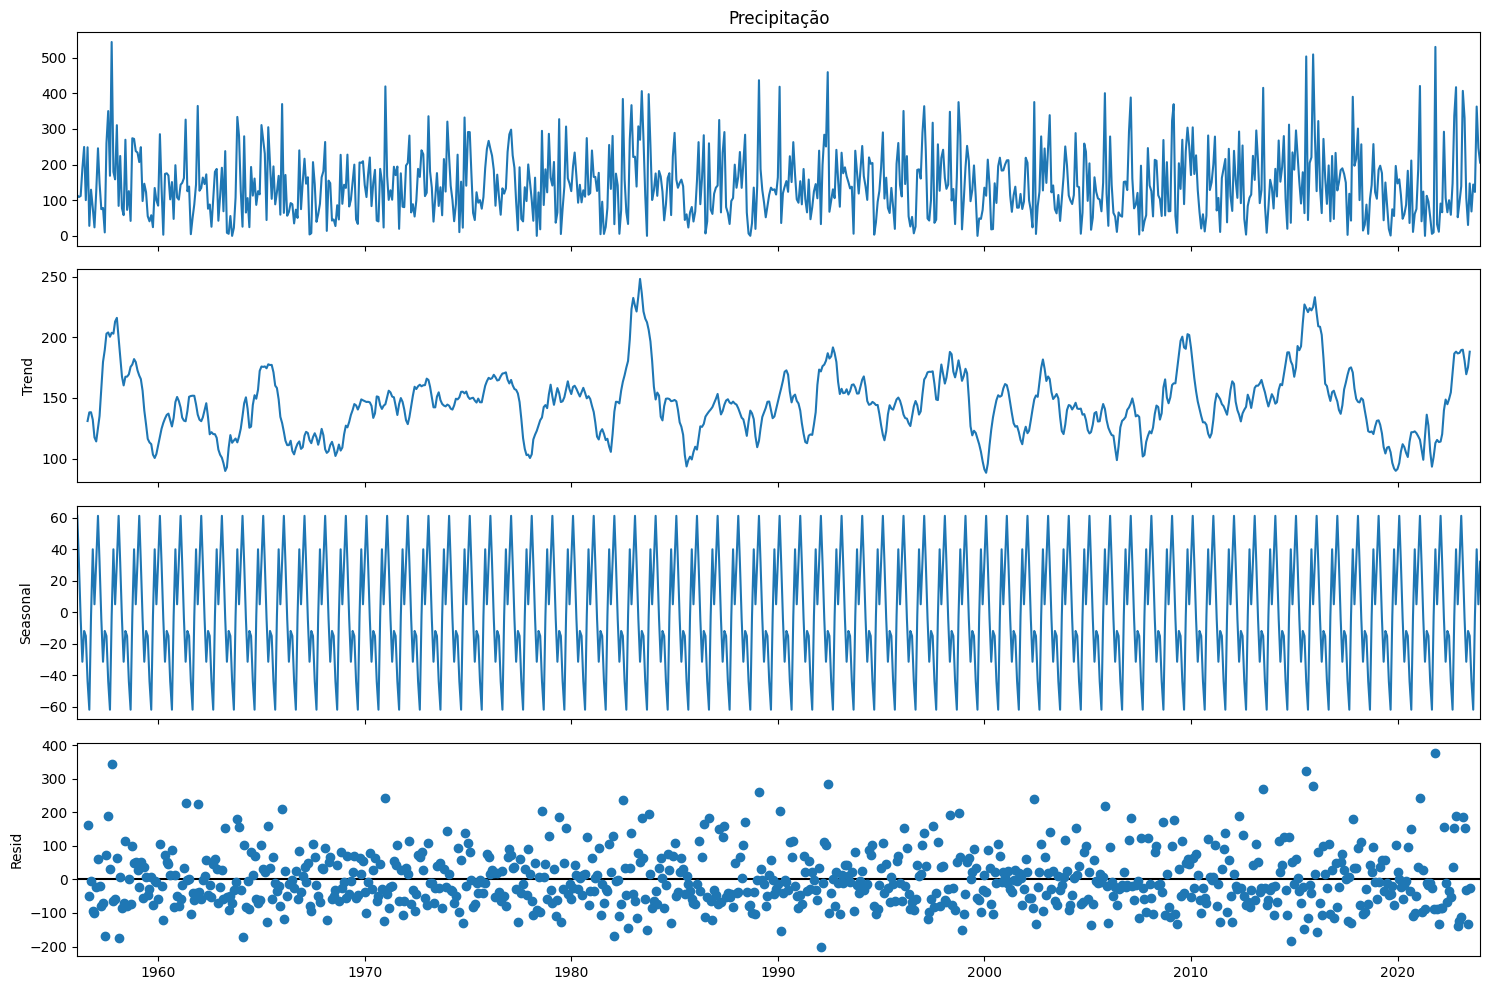

In [ ]:
decomposition_chuva = seasonal_decompose(df1['Precipitação'],
                                   model='add')


# Plot the decomposed components (trend, seasonal, and residual)
fig = decomposition_chuva.plot()
plt.show()

# Autocorrelação
* A autocorrelação em séries temporais é uma medida estatística que avalia a correlação de uma série temporal com ela mesma em diferentes defasagens de tempo (lags);
* Ela mede o grau de dependência entre os valores de uma série em um momento específico e seus valores anteriores, indicando se há padrões temporais, como sazonalidade ou tendências, nos dados;
* Varia de -1 a 1, sendo zero ausência de correlação;

# Função de Autocorrelação (ACF):
* A ACF (Autocorrelation Function) é um gráfico que mostra a autocorrelação para diferentes defasagens ($ k = 1, 2, 3, \ldots $).
É usada para identificar:

  * Sazonalidade: Picos regulares em defasagens específicas (ex.: a cada 12 semanas para sazonalidade anual em dados semanais).
  * Tendência: Autocorrelações altas em defasagens iniciais que diminuem gradualmente.
  * Estacionariedade: Séries estacionárias (sem tendência ou sazonalidade forte) têm autocorrelações que caem rapidamente para zero.

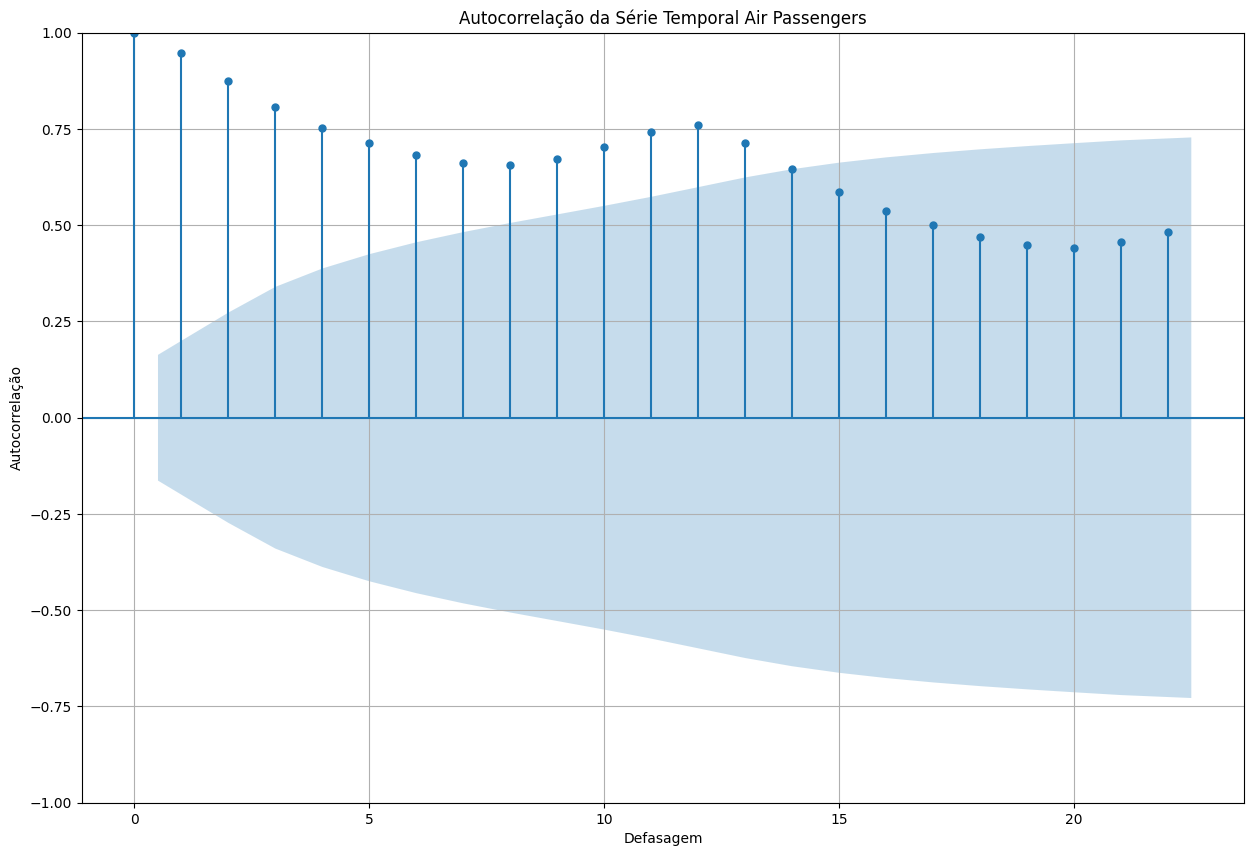

In [ ]:
# Gráfico ACF
plot_acf(df['#Passengers'])
plt.title('Autocorrelação da Série Temporal Air Passengers')
plt.xlabel('Defasagem')
plt.ylabel('Autocorrelação')
plt.grid(True)
plt.show()

# Análise do Gráfico ACF (Autocorrelação) AirPassengers:

O gráfico de Autocorrelação (ACF) mostra a correlação entre a série temporal e versões defasadas de si mesma. A análise deste gráfico nos ajuda a identificar padrões e a estrutura de dependência nos dados.

No gráfico ACF da série temporal "Air Passengers", observamos o seguinte:

* **Decaimento Lento e Gradual:** As barras de autocorrelação começam altas e diminuem lentamente à medida que a defasagem (lag) aumenta. Isso é um forte indicativo de **tendência** na série temporal. A alta correlação em defasagens maiores sugere que os valores atuais são altamente influenciados por valores de períodos anteriores distantes.
* **Picos em Intervalos Regulares:** Além do decaimento gradual, podemos observar picos de autocorrelação em intervalos regulares (aproximadamente a cada 12 defasagens). Estes picos indicam **sazonalidade** na série temporal. A regularidade dos picos sugere que há um padrão repetitivo que se repete a cada 12 meses (o que faz sentido para dados de passageiros aéreos que podem ter padrões sazonais anuais).
* **Bandas de Confiança:** A área sombreada azul representa as bandas de confiança. Se as barras de autocorrelação ultrapassam essas bandas, a autocorrelação para aquela defasagem é considerada estatisticamente significativa (diferente de zero). No nosso gráfico, muitas barras estão fora das bandas de confiança, confirmando a presença de autocorrelação significativa e, portanto, de tendências e/ou sazonalidade.

**Em resumo:** O gráfico ACF para a série "Air Passengers" claramente mostra a presença de tendência (decaimento lento) e sazonalidade (picos a cada 12 meses). Isso corrobora a decomposição sazonal que vimos anteriormente, onde identificamos tanto uma tendência crescente quanto um padrão sazonal anual.

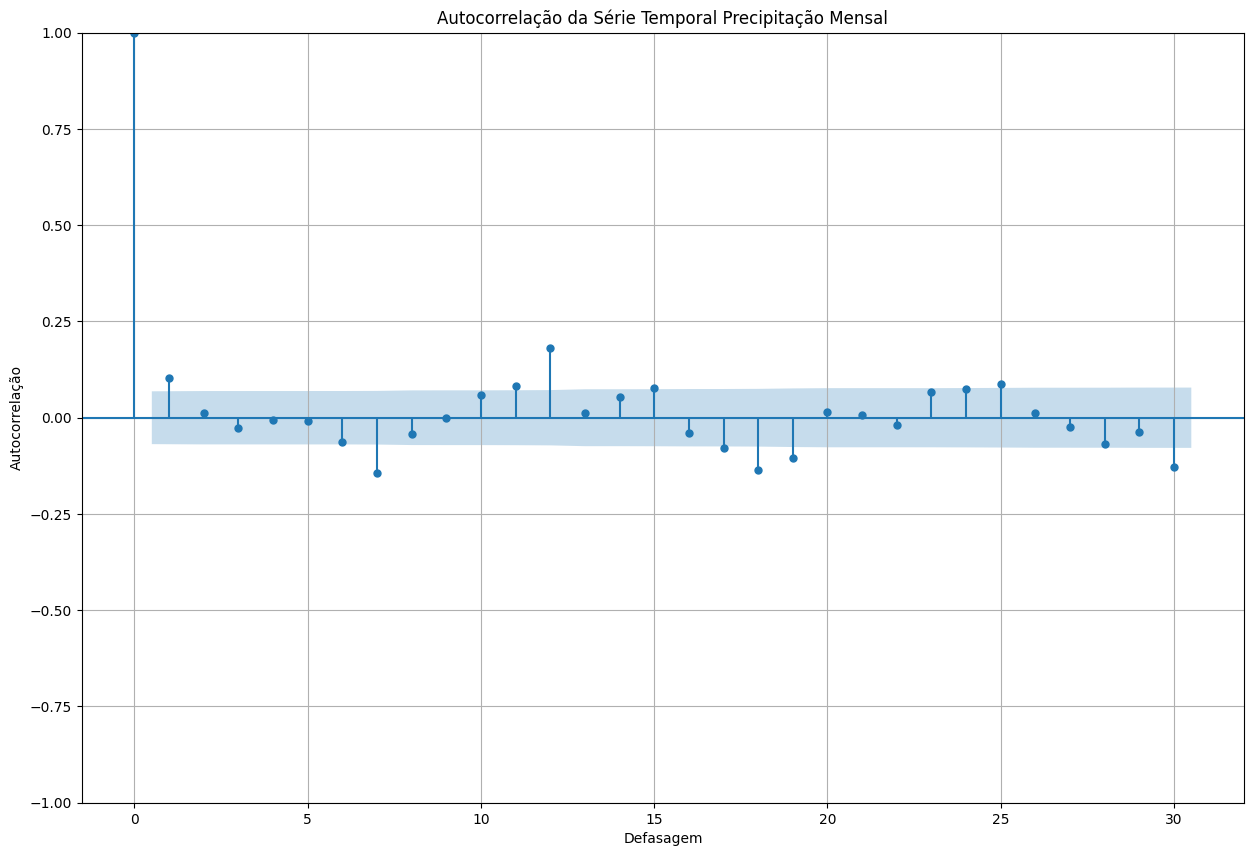

In [ ]:
# Gráfico ACF
plot_acf(df1['Precipitação'])
plt.title('Autocorrelação da Série Temporal Precipitação Mensal')
plt.xlabel('Defasagem')
plt.ylabel('Autocorrelação')
plt.grid(True)
plt.show()

# Análise do Gráfico ACF (Autocorrelação) Precipitação Mensal:

O gráfico de Autocorrelação (ACF) para a série temporal de Precipitação Mensal nos mostra a correlação da série com suas versões defasadas. A análise deste gráfico nos ajuda a entender os padrões e a estrutura de dependência nos dados de precipitação.

No gráfico ACF da série temporal "Precipitação Mensal", observamos o seguinte:

* **Decaimento Rápido:** As barras de autocorrelação caem rapidamente para zero após as primeiras defasagens. Isso sugere que a influência de valores passados na precipitação atual diminui rapidamente com o tempo. Um decaimento rápido no ACF é característico de séries que não possuem uma tendência forte.
* **Picos em Intervalos Regulares:** Podemos observar picos de autocorrelação positivos em intervalos regulares (aproximadamente a cada 12 defasagens). Estes picos indicam a presença de **sazonalidade** na série temporal. A regularidade dos picos sugere um padrão repetitivo que se repete a cada 12 meses, o que é esperado para dados de precipitação que podem ter padrões sazonais anuais (por exemplo, estações chuvosas e secas).
* **Autocorrelações Negativas:** Há algumas barras de autocorrelação negativas que ultrapassam as bandas de confiança, indicando uma correlação negativa significativa em certas defasagens. Isso significa que um valor alto em um determinado mês pode estar associado a um valor baixo em um mês defasado específico.
* **Bandas de Confiança:** A área sombreada azul representa as bandas de confiança. As barras de autocorrelação que ultrapassam essas bandas são estatisticamente significativas. No nosso gráfico, as autocorrelações nas primeiras defasagens e nos múltiplos de 12 são significativas, confirmando a presença de dependência temporal e sazonalidade.

**Em resumo:** O gráfico ACF para a série "Precipitação Mensal" sugere a presença de sazonalidade anual (picos a cada 12 meses) e a ausência de uma tendência forte (decaimento rápido). Isso é consistente com a decomposição sazonal que vimos anteriormente, onde a sazonalidade era proeminente, enquanto a tendência parecia mais como flutuações de longo prazo do que um crescimento ou decaimento constante.

# Função de Autocorrelação Parcial (PACF):
* A PACF (Partial Autocorrelation Function) é um gráfico que mostra a correlação entre a série temporal e suas versões defasadas, removendo a influência das correlações em defasagens intermediárias.
* Em outras palavras, ela mede a correlação direta entre $ y_t $ e $ y_{t-k} $, após remover a influência de $ y_{t-1}, y_{t-2}, \ldots, y_{t-k+1} $.
* É usada para identificar:
  * A ordem de um modelo AutoRegressivo (AR): Onde o gráfico PACF "corta" (cai significativamente para zero) após um certo número de defasagens indica a ordem do modelo AR.

* No contexto do PACF, ao calcular a autocorrelação parcial, o objetivo é medir a relação entre um valor atual e um valor atrasado (lag), enquanto elimina a influência de todos os valores intermediários. Por exemplo, se você estiver analisando a relação entre o valor em t (atual) e o valor em t-2 (dois períodos anteriores), o PACF isolaria esse efeito, não considerando o impacto de t-1 (um período anterior).

* Portanto, os atrasos anteriores são todos os valores que vêm antes do ponto de tempo que você está analisando, e ao organizar os dados em um modelo, precisamos entender como cada um desses valores anteriores afeta o valor atual para construir previsões mais precisas. Isso é fundamental ao trabalhar com modelos de séries temporais como ARIMA, onde a escolha dos parâmetros p (para autoregressão) e q (para média móvel) é baseada nas correlações que os atrasos anteriores têm com os dados atuais.

* Imagine que você quer saber a correlação entre o preço de uma ação hoje (tempo t) e o preço de dois dias atrás (tempo t-2). No ACF, essa correlação incluiria o efeito do preço de ontem (tempo t-1). No PACF, a correlação entre t e t-2 é calculada "limpando" a influência de t-1. Em outras palavras, o PACF isola a correlação direta entre t e t-k, sem a "contaminação" das defasagens entre eles.

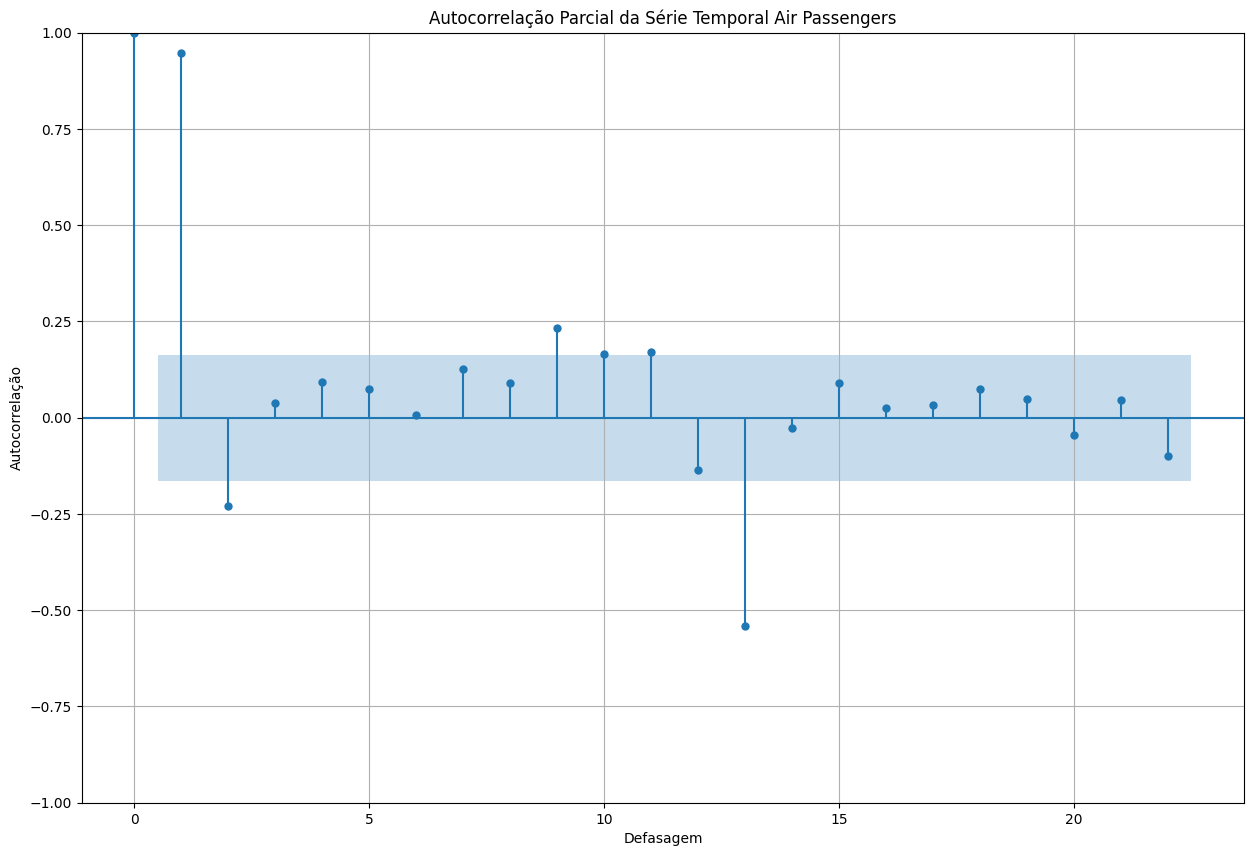

In [ ]:
# Gráfico PACF
plot_pacf(df['#Passengers'])
plt.title('Autocorrelação Parcial da Série Temporal Air Passengers')
plt.xlabel('Defasagem')
plt.ylabel('Autocorrelação')
plt.grid(True)
plt.show()

# Análise do Gráfico PACF (Autocorrelação Parcial) Air Passengers:

O gráfico de Autocorrelação Parcial (PACF) mostra a correlação direta entre a série temporal e suas versões defasadas, removendo a influência das correlações em defasagens intermediárias. Ele é particularmente útil para identificar a ordem de modelos AutoRegressivos (AR).

No gráfico PACF da série temporal "Air Passengers", observamos o seguinte:

* **Pico Significativo na Primeira Defasagem:** Há um pico grande e estatisticamente significativo na primeira defasagem (lag 1). Isso indica que o valor atual da série é fortemente correlacionado com o valor imediatamente anterior, mesmo após remover a influência de outras defasagens.
* **Picos Significativos em Defasagens Sazonais:** Observamos picos significativos em defasagens que são múltiplos da sazonalidade (aproximadamente a cada 12 defasagens). Estes picos indicam a correlação direta entre o valor atual e os valores dos mesmos meses em anos anteriores, após remover a influência dos meses intermediários. Isso reforça a presença de sazonalidade anual na série.
* **Autocorrelações Decrescentes:** Após os picos iniciais e sazonais, as autocorrelações parciais tendem a diminuir, com algumas defasagens ainda sendo estatisticamente significativas (ultrapassando as bandas de confiança), mas com valores menores.
* **Bandas de Confiança:** A área sombreada azul representa as bandas de confiança. As barras que ultrapassam essas bandas indicam autocorrelações parciais estatisticamente significativas.

**Em resumo:** O gráfico PACF para a série "Air Passengers" sugere que o valor atual da série é diretamente influenciado pelo valor do mês anterior e pelos valores dos mesmos meses em anos anteriores. A presença de picos significativos na primeira defasagem e em múltiplos da sazonalidade (12) é um indicativo útil para a escolha de modelos de séries temporais, como modelos ARIMA, que consideram componentes autorregressivos e sazonais.

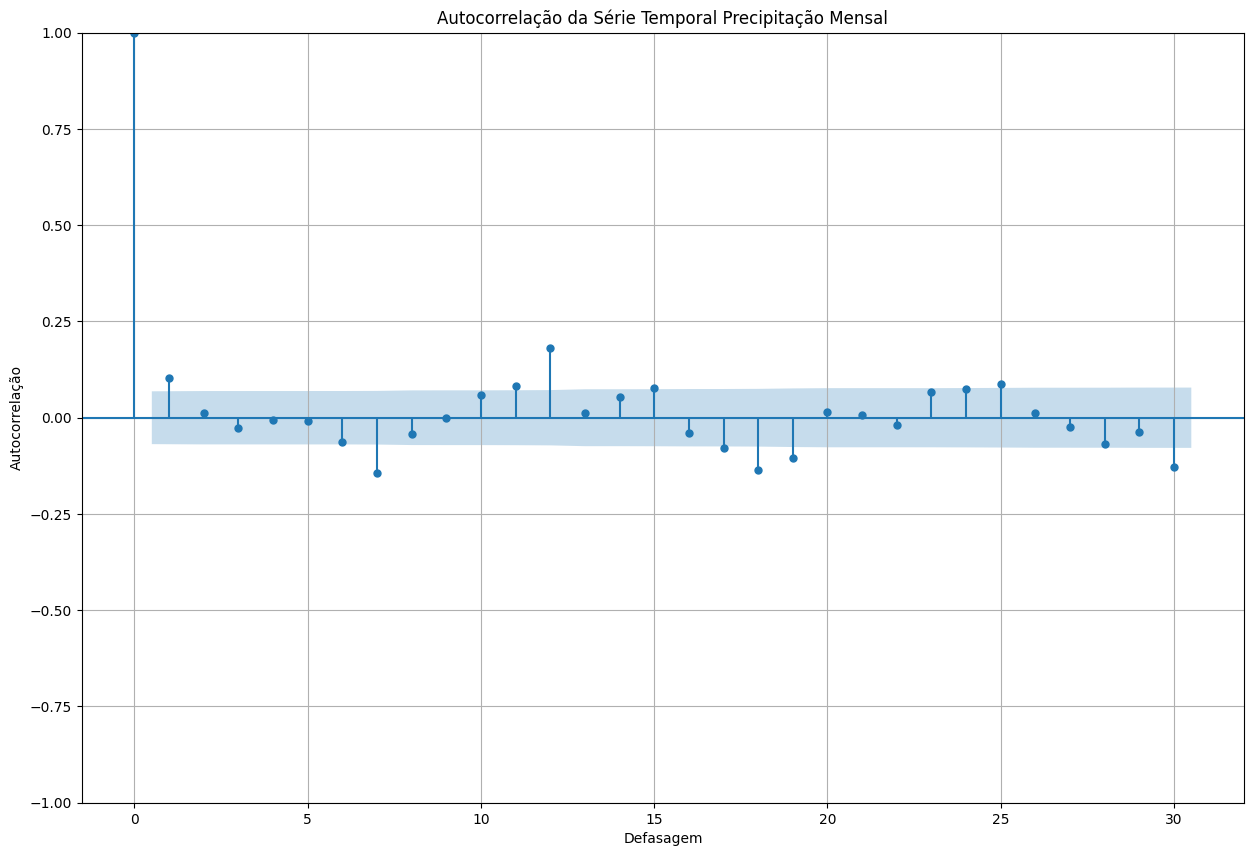

In [ ]:
# Gráfico ACF
plot_acf(df1['Precipitação'])
plt.title('Autocorrelação da Série Temporal Precipitação Mensal')
plt.xlabel('Defasagem')
plt.ylabel('Autocorrelação')
plt.grid(True)
plt.show()

# Análise do Gráfico PACF (Autocorrelação Parcial) Precipitação Mensal:

O gráfico de Autocorrelação Parcial (PACF) para a série temporal de Precipitação Mensal mostra a correlação direta entre a série temporal e suas versões defasadas, removendo a influência das correlações em defasagens intermediárias. Ele é útil para identificar a ordem de modelos AutoRegressivos (AR).

No gráfico PACF da série temporal "Precipitação Mensal", observamos o seguinte:

* **Pico Significativo na Primeira Defasagem:** Há um pico estatisticamente significativo na primeira defasagem (lag 1). Isso indica uma correlação direta entre a precipitação atual e a precipitação do mês imediatamente anterior.
* **Picos Significativos em Defasagens Sazonais:** Podemos observar picos significativos em defasagens que são múltiplos da sazonalidade (aproximadamente a cada 12 defasagens). Estes picos indicam a correlação direta entre a precipitação atual e a precipitação dos mesmos meses em anos anteriores, após remover a influência dos meses intermediários. Isso reforça a presença de sazonalidade anual na série, embora a magnitude desses picos seja menor do que no gráfico ACF.
* **Autocorrelações Menos Significativas:** Após os picos iniciais e sazonais, a maioria das autocorrelações parciais caem dentro das bandas de confiança, indicando que a correlação direta com defasagens maiores (além da sazonalidade) não é estatisticamente significativa.
* **Bandas de Confiança:** A área sombreada azul representa as bandas de confiança. As barras que ultrapassam essas bandas indicam autocorrelações parciais estatisticamente significativas.

**Em resumo:** O gráfico PACF para a série "Precipitação Mensal" sugere que a precipitação atual é diretamente influenciada principalmente pela precipitação do mês anterior e pelos padrões sazonais anuais. A queda rápida para dentro das bandas de confiança após as primeiras defasagens (exceto nos múltiplos de 12) sugere que um modelo AR de ordem baixa pode ser apropriado para capturar a dependência linear na série, juntamente com a consideração da sazonalidade.

# Ruído Branco(white noise)

* Ruído branco é uma série temporal que consiste em observações independentes e identicamente distribuídas (i.i.d.);
* Em um processo de ruído branco, não há correlação entre os valores em diferentes pontos no tempo;
* Isso significa que os valores passados não fornecem nenhuma informação sobre os valores futuros;
* Um gráfico de ACF de ruído branco mostrará barras de autocorrelação próximas de zero para todas as defasagens, exceto para a defasagem 0 (que é sempre 1, pois a série está perfeitamente correlacionada consigo mesma);
* É um conceito importante porque muitas técnicas de modelagem de séries temporais visam transformar uma série em um processo de ruído branco, o que indica que toda a estrutura de dependência foi capturada pelo modelo;
*  Se 5% dos intervalos estiveram fora da linha azul, não há ruído branco.

# Comparação dos Gráficos ACF e PACF para Identificar Ruído Branco:

Para analisar se uma série temporal se comporta como ruído branco, utilizamos tanto o gráfico ACF quanto o PACF, embora o ACF seja a ferramenta primária para essa verificação.

**Características de Ruído Branco nos Gráficos ACF e PACF:**

* **ACF (Autocorrelação):** Para uma série de ruído branco, as barras no gráfico ACF devem ser estatisticamente insignificantes (cair dentro das bandas de confiança) para todas as defasagens, exceto na defasagem 0 (que é sempre 1).
* **PACF (Autocorrelação Parcial):** Para uma série de ruído branco, as barras no gráfico PACF também devem ser estatisticamente insignificantes para todas as defasagens.

**Comparação dos Gráficos das Séries "Air Passengers" e "Precipitação Mensal" em Relação ao Ruído Branco:**

Analisando os gráficos ACF e PACF gerados anteriormente para as séries "Air Passengers" e "Precipitação Mensal", podemos concluir que **nenhuma das duas séries se assemelha a um processo de ruído branco**.

* **Série "Air Passengers":**
    * **ACF:** Mostrou um decaimento lento e gradual com picos significativos em múltiplos de 12 defasagens. Isso indica a presença de forte tendência e sazonalidade, características opostas ao ruído branco.
    * **PACF:** Mostrou picos significativos na primeira defasagem e em múltiplos de 12 defasagens, confirmando a dependência direta com valores passados e a sazonalidade.
    * **Conclusão:** Claramente não é ruído branco devido à forte tendência e sazonalidade.

* **Série "Precipitação Mensal":**
    * **ACF:** Mostrou um decaimento rápido, mas com picos significativos em múltiplos de 12 defasagens. Isso indica a presença de sazonalidade, embora a tendência seja menos proeminente do que na série Air Passengers. A presença de sazonalidade significativa impede que seja considerada ruído branco.
    * **PACF:** Mostrou picos significativos na primeira defasagem e em múltiplos de 12 defasagens.
    * **Conclusão:** Não é ruído branco devido à presença de sazonalidade significativa.

**Em resumo:** Uma série de ruído branco não apresenta padrões de autocorrelação significativos em nenhuma defasagem (além da defasagem 0). Os gráficos ACF e PACF das séries "Air Passengers" e "Precipitação Mensal" mostram claramente a presença de autocorrelações significativas (indicando tendência e/ou sazonalidade), o que nos permite afirmar que ambas as séries não são ruído branco.

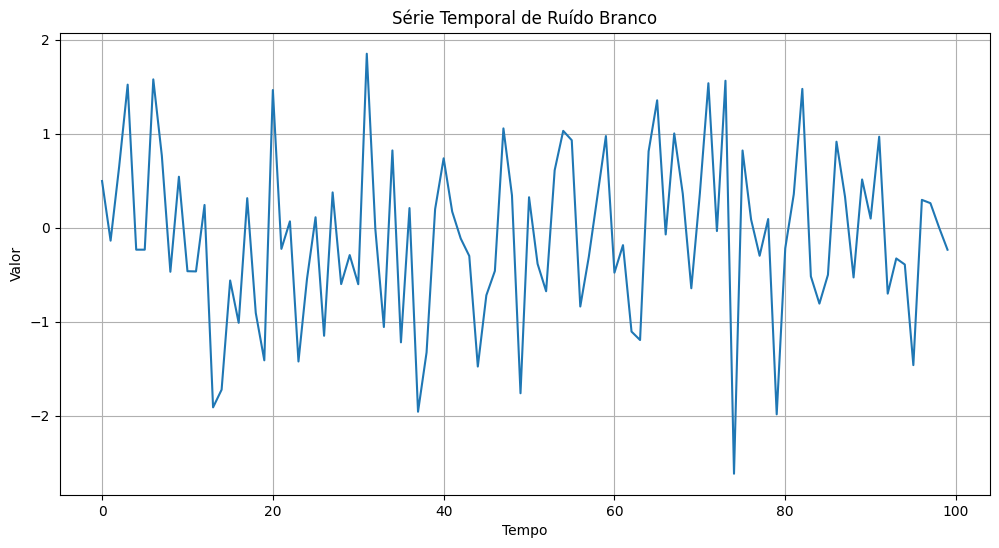

<Figure size 1200x600 with 0 Axes>

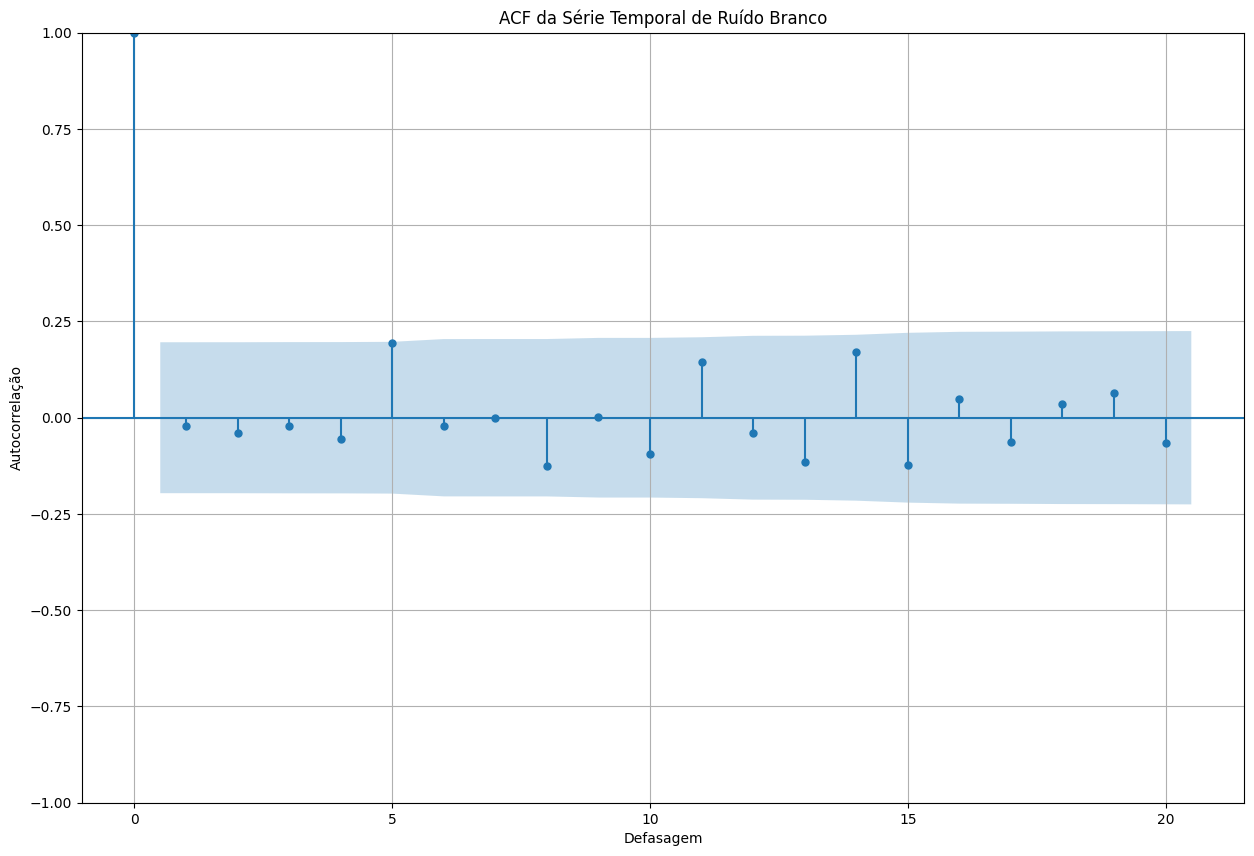

In [ ]:
np.random.seed(42)
white_noise = np.random.randn(100) # 100 pontos de dados de uma distribuição normal padrão

df_white_noise = pd.DataFrame(white_noise, columns=['Ruído Branco'])

# Plotar a série temporal
plt.figure(figsize=(12, 6))
plt.plot(df_white_noise['Ruído Branco'])
plt.title('Série Temporal de Ruído Branco')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

# Plotar o gráfico ACF para verificar o ruído branco
plt.figure(figsize=(12, 6))
plot_acf(df_white_noise['Ruído Branco'], lags=20) # Plotar até 20 defasagens
plt.title('ACF da Série Temporal de Ruído Branco')
plt.xlabel('Defasagem')
plt.ylabel('Autocorrelação')
plt.grid(True)
plt.show()

# Análise do Gráfico ACF para a Série Temporal de Ruído Branco:

O gráfico ACF (Autocorrelação) da série temporal que geramos é o indicador principal para verificar se ela se comporta como ruído branco.

No gráfico ACF da série "Ruído Branco", observamos o seguinte:

* **Pico Significativo Apenas na Defasagem 0:** O único pico alto e estatisticamente significativo está na defasagem 0. Isso é esperado, pois uma série sempre tem uma autocorrelação perfeita (igual a 1) consigo mesma na defasagem 0.
* **Barras Dentro das Bandas de Confiança para Defasagens > 0:** Para todas as defasagens maiores que 0, as barras de autocorrelação estão dentro das bandas de confiança (a área sombreada azul). Isso indica que as autocorrelações para essas defasagens não são estatisticamente diferentes de zero.
* **Ausência de Padrões:** Não há padrões visíveis de decaimento lento ou picos regulares em defasagens maiores.

**Por que isso indica Ruído Branco?**

A característica definidora do ruído branco é a ausência de correlação entre os valores da série em diferentes pontos no tempo. O gráfico ACF mede exatamente essa correlação em diferentes defasagens. Como as barras de autocorrelação (exceto na defasagem 0) estão dentro das bandas de confiança, concluímos que não há autocorrelação estatisticamente significativa na série gerada. Isso valida que a série se comporta como ruído branco, onde os valores são independentes e não são previsíveis com base em valores passados.

# Análise de Residuais, Valores Ajustados e Erros

* Valores Observados (Reais): São os valores da variável dependente (y) que foram efetivamente medidos ou registrados na sua série temporal ou conjunto de dados.

* Valores Ajustados (Previstos): São os valores da variável dependente (y) que são calculados ou previstos por um modelo estatístico (como uma regressão linear) com base nos valores da variável independente (x). Eles representam a estimativa do modelo para os valores observados. É o valor que se encontra na linha de regressão para um determinado ponto no eixo da variável independente (o eixo x).

* Residuais (Erros): São as diferenças entre os valores observados e os valores ajustados pelo modelo. Eles representam a parte dos dados que o modelo não conseguiu explicar. Um residual positivo indica que o valor observado foi maior que o valor previsto pelo modelo, enquanto um residual negativo indica que o valor observado foi menor que o valor previsto.

* Fórmula do Residual: Residual = Valor Observado - Valor Ajustado

* Em um bom modelo, esperamos que os residuais sejam pequenos, aleatórios e não mostrem padrões sistemáticos.

* Não pode exister uma autocorrelação entre os resíduos. Se existe autocorrelação, existe informação nos resíduos que deveria ser usado na previsão. Isso ocorre devido o modelo não conseguir identificar algum padrão.

* Média dever ser aproximadamente zero.

* Variância constante.

* Dados devem estar distribuídos normalmente.

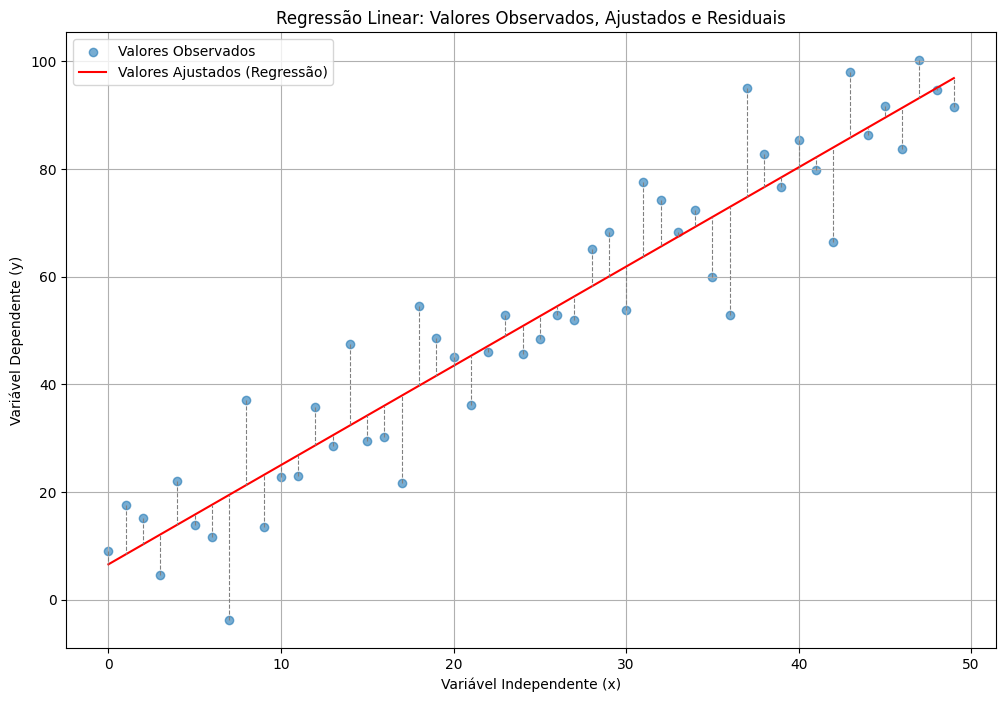

In [ ]:
# Exemplo com Regressão Linear

import statsmodels.api as sm

# Definindo as variáveis
X = df_nao_temporal['x']  # Variável independente
y = df_nao_temporal['y']  # Variável dependente

# Adicionando uma constante ao X para o intercepto da regressão
X = sm.add_constant(X)

# Criando e ajustando o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Obtendo os valores ajustados (previstos)
valores_ajustados = model.predict(X)

# Calculando os residuais
residuais = y - valores_ajustados

# Plotando o gráfico de regressão linear com residuais
plt.figure(figsize=(12, 8))

# Plotar os pontos de dados observados
plt.scatter(df_nao_temporal['x'], y, label='Valores Observados', alpha=0.6)

# Plotar a linha de regressão (Valores Ajustados)
plt.plot(df_nao_temporal['x'], valores_ajustados, color='red', label='Valores Ajustados (Regressão)')

# Plotar as linhas dos residuais
for i in range(len(df_nao_temporal)):
    plt.plot([df_nao_temporal['x'][i], df_nao_temporal['x'][i]], [y[i], valores_ajustados[i]], color='gray', linestyle='--', linewidth=0.8)

plt.title('Regressão Linear: Valores Observados, Ajustados e Residuais')
plt.xlabel('Variável Independente (x)')
plt.ylabel('Variável Dependente (y)')
plt.legend()
plt.grid(True)
plt.show()

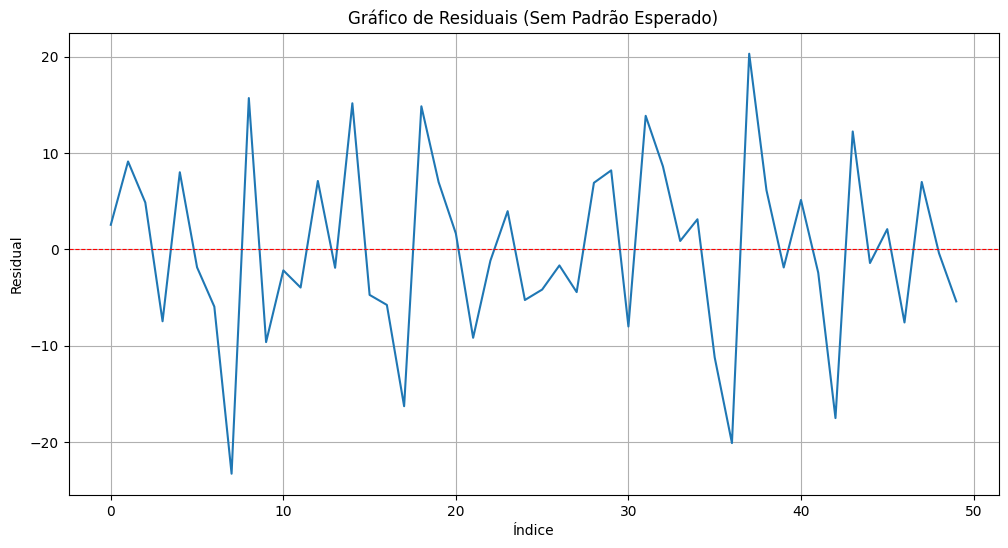

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(residuais)
plt.title('Gráfico de Residuais (Sem Padrão Esperado)')
plt.xlabel('Índice')
plt.ylabel('Residual')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8) # Adiciona linha de referência no zero
plt.grid(True)
plt.show()

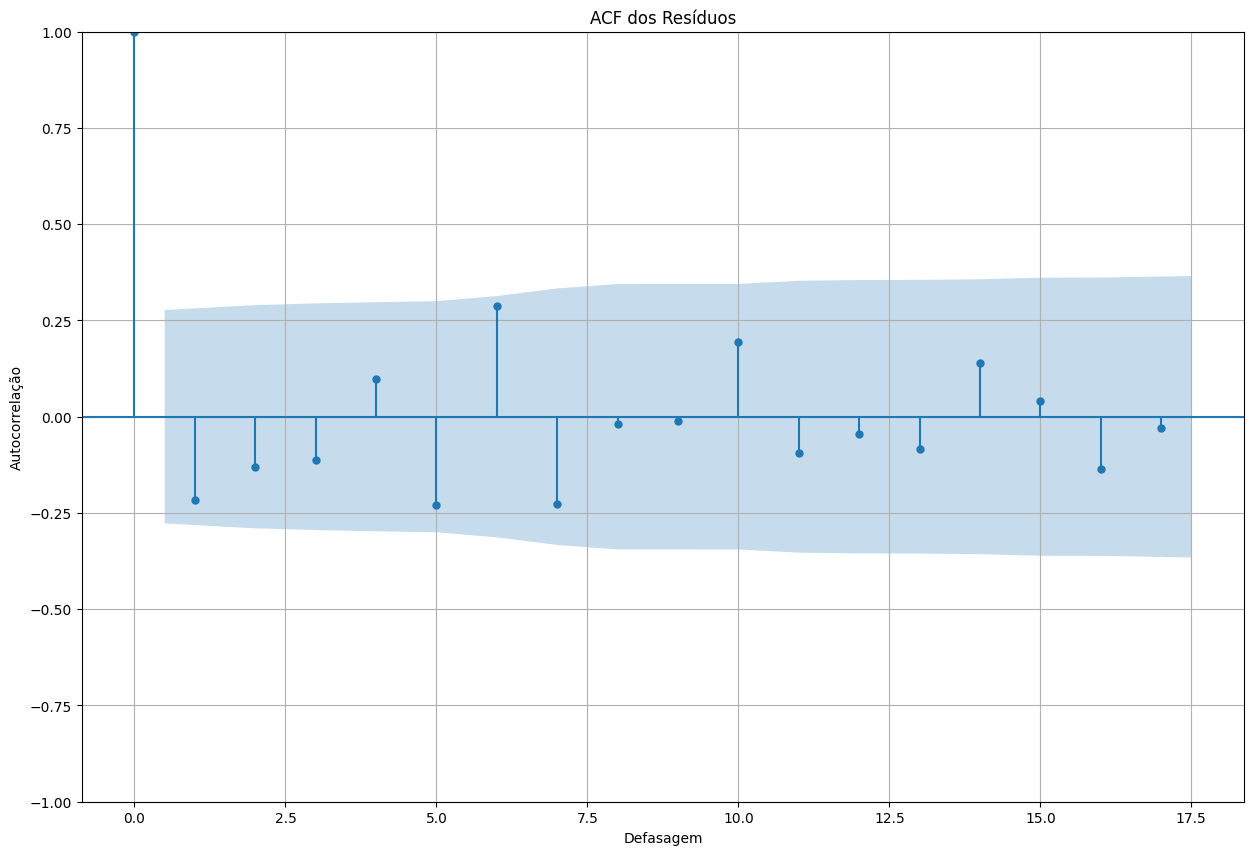

In [ ]:
plot_acf(residuais)
plt.title('ACF dos Resíduos')
plt.xlabel('Defasagem')
plt.ylabel('Autocorrelação')
plt.grid(True)
plt.show()

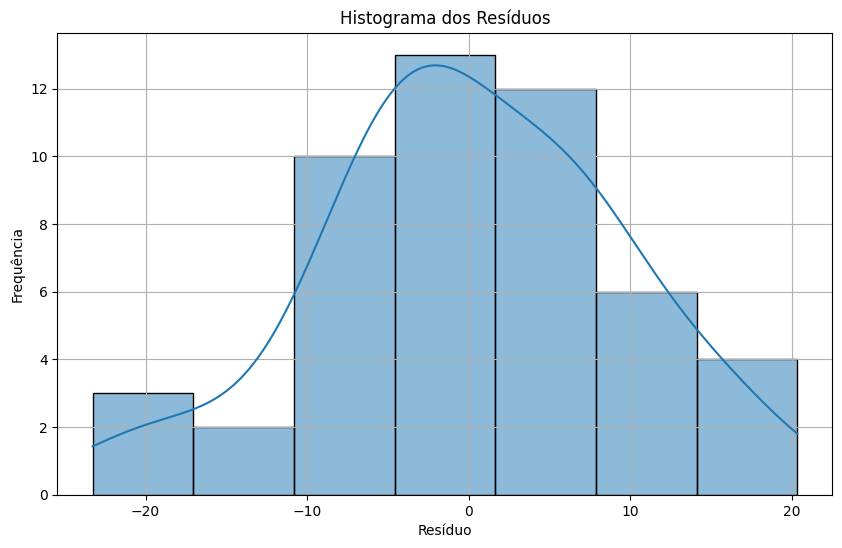

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(residuais, kde=True)
plt.title('Histograma dos Resíduos')
plt.xlabel('Resíduo')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Teste de Shapiro-Wilk

O Teste de Shapiro-Wilk é um teste de hipótese estatística utilizado para avaliar se uma dada amostra de dados se desvia significativamente de uma distribuição normal.

**Como funciona:**

1.  **Hipótese Nula (H0):** A amostra de dados provém de uma população que segue uma distribuição normal.
2.  **Hipótese Alternativa (H1):** A amostra de dados não provém de uma população que segue uma distribuição normal.

O teste calcula um valor estatístico (W) e um valor p (p-value).

*   O **valor estatístico (W)** mede o quão bem os dados se ajustam a uma distribuição normal. Valores mais próximos de 1 indicam um ajuste melhor.
*   O **valor p (p-value)** é a probabilidade de observar uma estatística de teste tão extrema quanto a calculada, assumindo que a hipótese nula é verdadeira.

**Interpretação:**

Comparamos o valor p com um nível de significância (geralmente denotado por α, comumente 0.05).

*   Se **valor p > α**: Não rejeitamos a hipótese nula. Isso sugere que não há evidência estatística forte para concluir que os dados não são normalmente distribuídos.
*   Se **valor p ≤ α**: Rejeitamos a hipótese nula. Isso sugere que há evidência estatística para concluir que os dados não seguem uma distribuição normal.

No contexto da análise de resíduos em modelos estatísticos (como a regressão linear que fizemos), testar a normalidade dos resíduos é importante porque muitos modelos assumem que os erros (resíduos) são normalmente distribuídos. Se os resíduos não forem normais, isso pode indicar que o modelo não é o mais apropriado ou que há outras questões nos dados que precisam ser abordadas.

In [ ]:
from scipy.stats import shapiro

# Realizar o teste de Shapiro-Wilk nos resíduos
shapiro_test_statistic, shapiro_p_value = shapiro(residuais)

print(f"Shapiro-Wilk Test Statistic: {shapiro_test_statistic:.4f}")
print(f"Shapiro-Wilk P-value: {shapiro_p_value:.4f}")

# Interpretar o resultado
alpha = 0.05
if shapiro_p_value > alpha:
    print("Os resíduos parecem vir de uma distribuição normal (não rejeitar H0)")
else:
    print("Os resíduos não parecem vir de uma distribuição normal (rejeitar H0)")

Shapiro-Wilk Test Statistic: 0.9852
Shapiro-Wilk P-value: 0.7788
Os resíduos parecem vir de uma distribuição normal (não rejeitar H0)


# Decomposição

# Por que é importante fazer a decomposição da série temporal?

A decomposição de uma série temporal é um processo que divide a série em seus componentes principais: tendência, sazonalidade e resíduos (ou erro). Entender e isolar esses componentes é importante por várias razões:

1.  **Entendimento dos Padrões:** A decomposição nos ajuda a visualizar e compreender os diferentes padrões que influenciam a série temporal. Isso torna mais fácil identificar se há um crescimento ou declínio a longo prazo (tendência), padrões que se repetem em intervalos fixos (sazonalidade) ou flutuações irregulares (resíduos).
2.  **Modelagem:** Muitos modelos de séries temporais (como ARIMA) pressupõem que a série (ou os resíduos após modelar a tendência e sazonalidade) é estacionária (sem tendência ou sazonalidade). A decomposição ajuda a identificar a presença desses componentes para que possam ser tratados adequadamente na modelagem.
3.  **Previsão:** Ao entender os componentes de uma série, podemos modelá-los separadamente ou escolher modelos que sejam mais apropriados para séries com tendências e/ou sazonalidade. Isso geralmente leva a previsões mais precisas. Por exemplo, podemos prever a tendência futura e a sazonalidade esperada, e então combinar essas previsões com a análise dos resíduos.
4.  **Identificação de Anomalias:** Os resíduos representam a parte da série que não é explicada pela tendência e sazonalidade. A análise dos resíduos pode ajudar a identificar pontos atípicos (anomalias ou outliers) que podem precisar de investigação adicional.
5.  **Comparação de Séries:** Ao decompor diferentes séries temporais, podemos comparar seus componentes de tendência e sazonalidade, mesmo que as séries originais tenham escalas ou níveis diferentes.

Em resumo, a decomposição nos fornece uma visão mais clara da estrutura subjacente da série temporal, o que é essencial para escolher métodos de análise e modelagem apropriados e para fazer previsões mais informadas.

# Modelos de Decomposição e Nível Médio da Série

A decomposição de séries temporais busca separar uma série em seus componentes fundamentais: tendência (T), sazonalidade (S) e resíduos (R). A forma como esses componentes interagem determina o tipo de modelo de decomposição a ser utilizado: aditivo ou multiplicativo.

**Modelo Aditivo:**

Neste modelo, assume-se que a magnitude das flutuações sazonais e dos resíduos é relativamente constante ao longo do tempo, independentemente do nível da série. A relação entre os componentes é expressa pela soma:

$$ Y_t = T_t + S_t + R_t $$

*   $Y_t$: Valor observado da série temporal no tempo $t$.
*   $T_t$: Componente de tendência no tempo $t$.
*   $S_t$: Componente de sazonalidade no tempo $t$.
*   $R_t$: Componente residual (erro) no tempo $t$.

Este modelo é apropriado quando a variação sazonal e aleatória não aumenta com o nível da série. Em um modelo aditivo, a sazonalidade e os resíduos flutuam em torno da tendência de forma constante.

**Modelo Multiplicativo:**

Neste modelo, assume-se que a magnitude das flutuações sazonais e dos resíduos é proporcional ao nível da série. Ou seja, as flutuações aumentam ou diminuem conforme o nível da série aumenta ou diminui. A relação entre os componentes é expressa pela multiplicação:

$$ Y_t = T_t \times S_t \times R_t $$

Para aplicar este modelo, os valores da série devem ser positivos. É comum transformar séries multiplicativas em aditivas aplicando um logaritmo:

$$ \log(Y_t) = \log(T_t) + \log(S_t) + \log(R_t) $$

Este modelo é apropriado quando a variação sazonal e aleatória aumenta com o nível da série.

**Nível Médio da Série e a Escolha do Modelo:**

O "nível médio" da série, muitas vezes refletido pela tendência, é crucial para decidir entre um modelo aditivo e um multiplicativo.

*   Se as flutuações sazonais e os resíduos têm uma amplitude **constante** em torno da tendência, um **modelo aditivo** é mais adequado. O nível médio da série não afeta a *magnitude* da sazonalidade e dos resíduos.
*   Se as flutuações sazonais e os resíduos têm uma amplitude que **aumenta** (ou diminui) conforme a tendência aumenta (ou diminui), um **modelo multiplicativo** é mais adequado. A sazonalidade e os resíduos são proporcionais ao nível médio da série.

Observar o gráfico da série temporal original e a decomposição sazonal pode ajudar a fazer essa escolha. Se a amplitude das oscilações sazonais parece aumentar ao longo do tempo (junto com a tendência), o modelo multiplicativo é provavelmente mais apropriado. Se a amplitude é relativamente constante, o modelo aditivo é mais adequado.

No contexto da série "Air Passengers", vimos que a amplitude das flutuações sazonais aumentava com o tempo, o que sugere que um modelo multiplicativo poderia ser mais apropriado, embora tenhamos usado um modelo aditivo para ilustração inicial. Para a série de "Precipitação Mensal", as flutuações pareciam menos claramente proporcionais à tendência, e um modelo aditivo foi usado. A escolha do modelo de decomposição impacta a forma como a sazonalidade e os resíduos são calculados e interpretados.

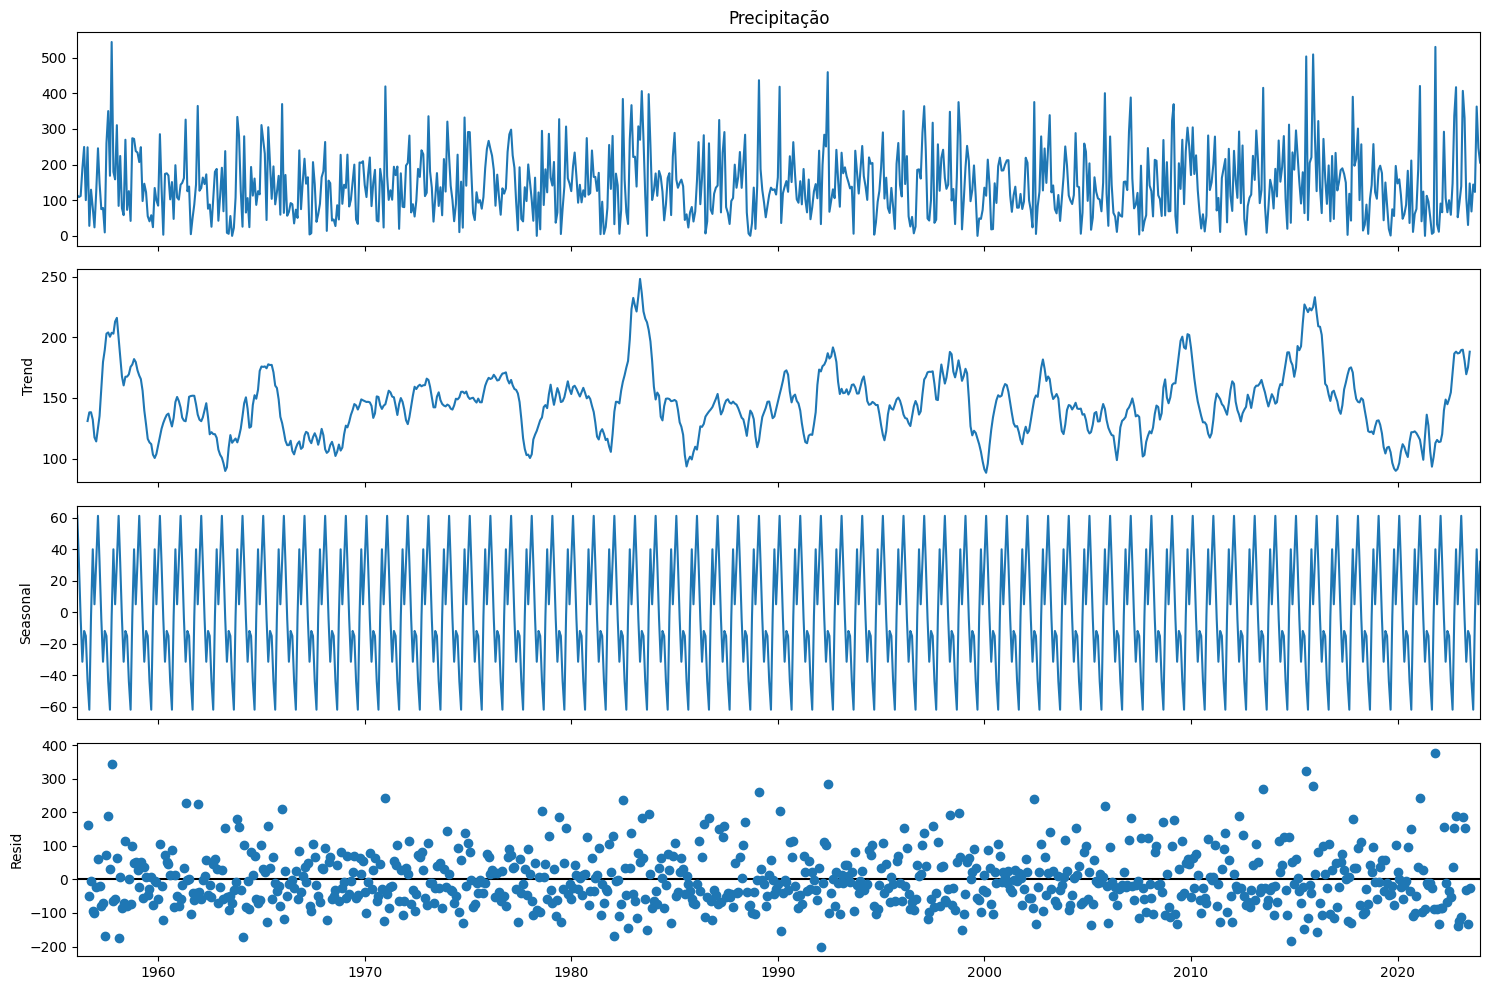

In [ ]:
decomposition_chuva = seasonal_decompose(df1['Precipitação'],
                                   model='add')


# Plot the decomposed components (trend, seasonal, and residual)
fig = decomposition_chuva.plot()
plt.show()

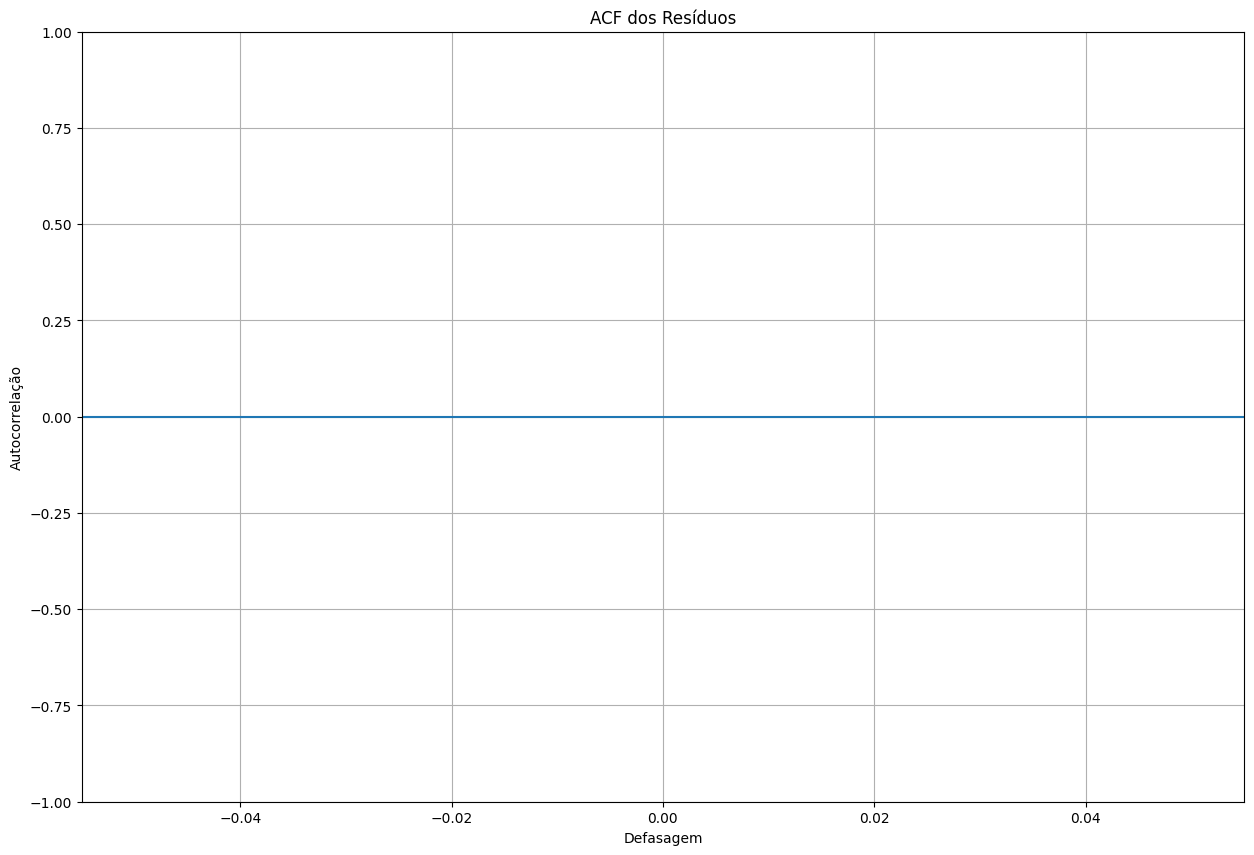

In [ ]:
plot_acf(decomposition_chuva.resid)
plt.title('ACF dos Resíduos')
plt.xlabel('Defasagem')
plt.ylabel('Autocorrelação')
plt.grid(True)
plt.show()

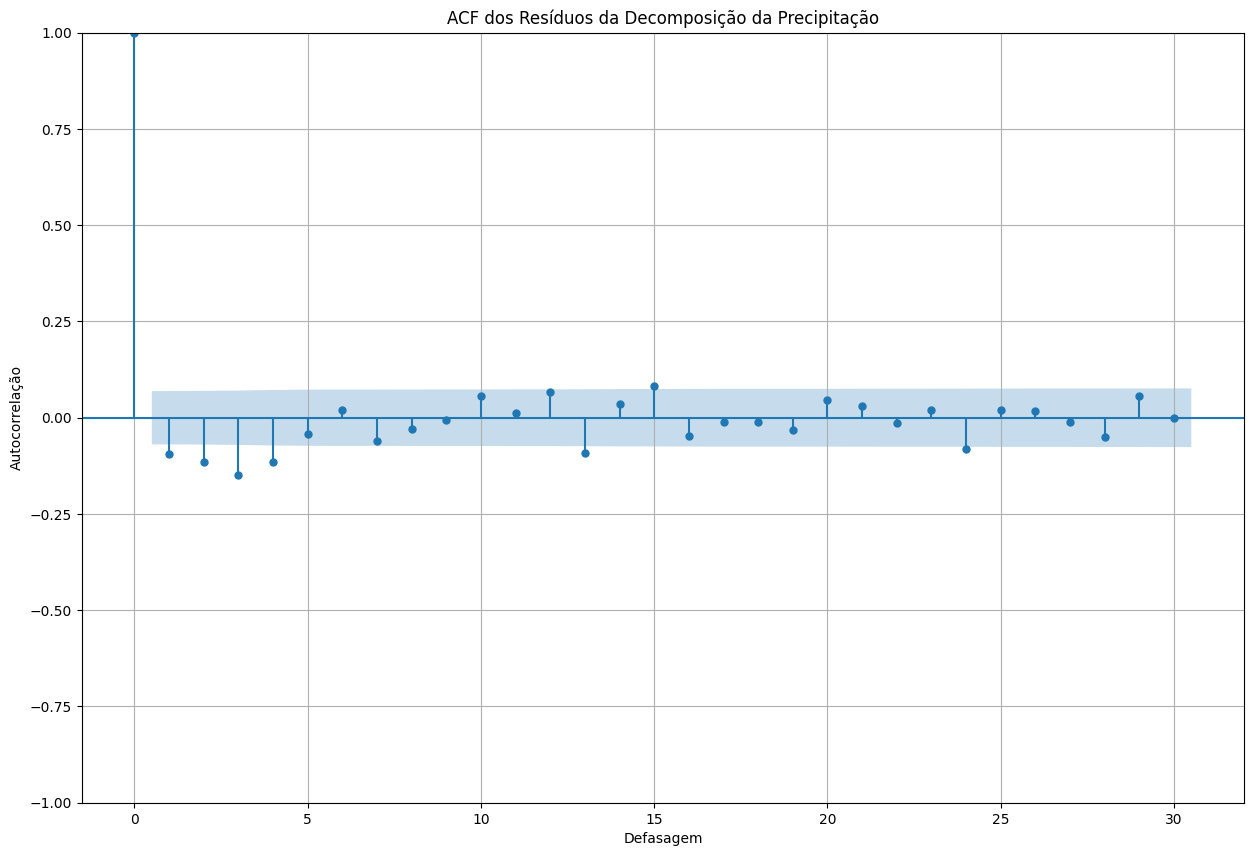

In [ ]:
plot_acf(decomposition_chuva.resid.dropna()) # Usar dropna() para remover NaNs se houver
plt.title('ACF dos Resíduos da Decomposição da Precipitação')
plt.xlabel('Defasagem')
plt.ylabel('Autocorrelação')
plt.grid(True)
plt.show()

## Análise do Gráfico ACF dos Resíduos da Decomposição da Precipitação

O gráfico ACF dos resíduos da decomposição da série de precipitação mostra que a maioria das barras de autocorrelação está dentro das bandas de confiança. Isso significa que a decomposição removeu grande parte da estrutura de dependência temporal (tendência e sazonalidade) da série original.

Se os resíduos fossem completamente ruído branco, todas as barras (exceto na defasagem 0) estariam dentro das bandas de confiança. No nosso caso, há algumas barras que tocam ou ultrapassam ligeiramente as bandas, o que pode indicar que ainda existe alguma pequena autocorrelação restante nos resíduos que o modelo de decomposição aditivo não capturou totalmente.

Isso indica que talvez haja espaço para refinar o modelo. A decomposição aditiva é um modelo simples que assume que os componentes são somados. Para essa série de precipitação, que tem flutuações irregulares e picos grandes, talvez um modelo multiplicativo ou modelos mais complexos como ARIMA possam capturar melhor a variação nos resíduos.

Em resumo: os resíduos estão próximos de ruído branco, o que é positivo. Contudo, pode ser necessário usar técnicas mais avançadas para capturar completamente a estrutura restante nos resíduos.

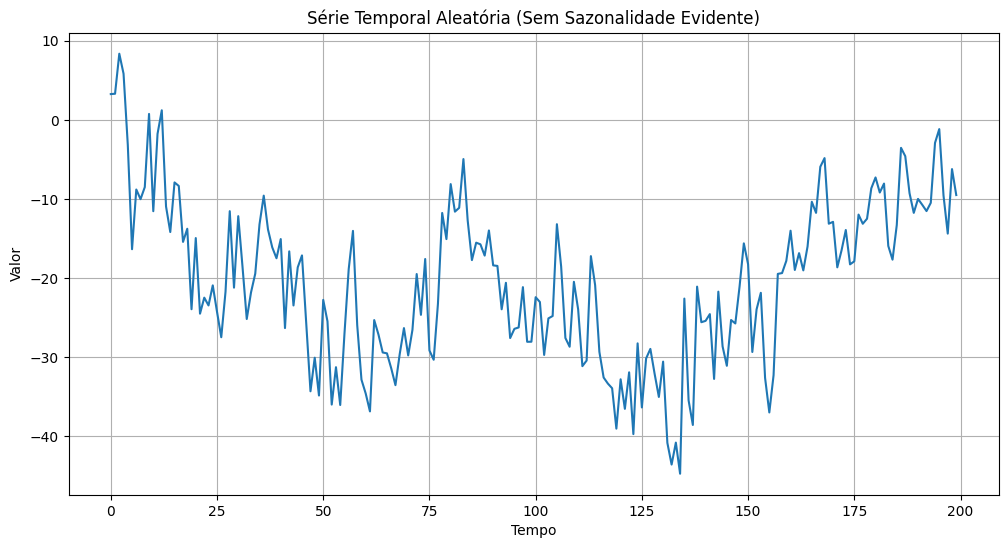

In [ ]:
np.random.seed(45) # Para reprodutibilidade
# Criando uma série temporal aleatória sem sazonalidade evidente
# Pode ser um passeio aleatório com algum ruído
random_series = np.cumsum(np.random.randn(200) * 2) + np.random.randn(200) * 5

df_random_series = pd.DataFrame(random_series, columns=['Valor'])

# Plotar a série temporal
plt.figure(figsize=(12, 6))
plt.plot(df_random_series['Valor'])
plt.title('Série Temporal Aleatória (Sem Sazonalidade Evidente)')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

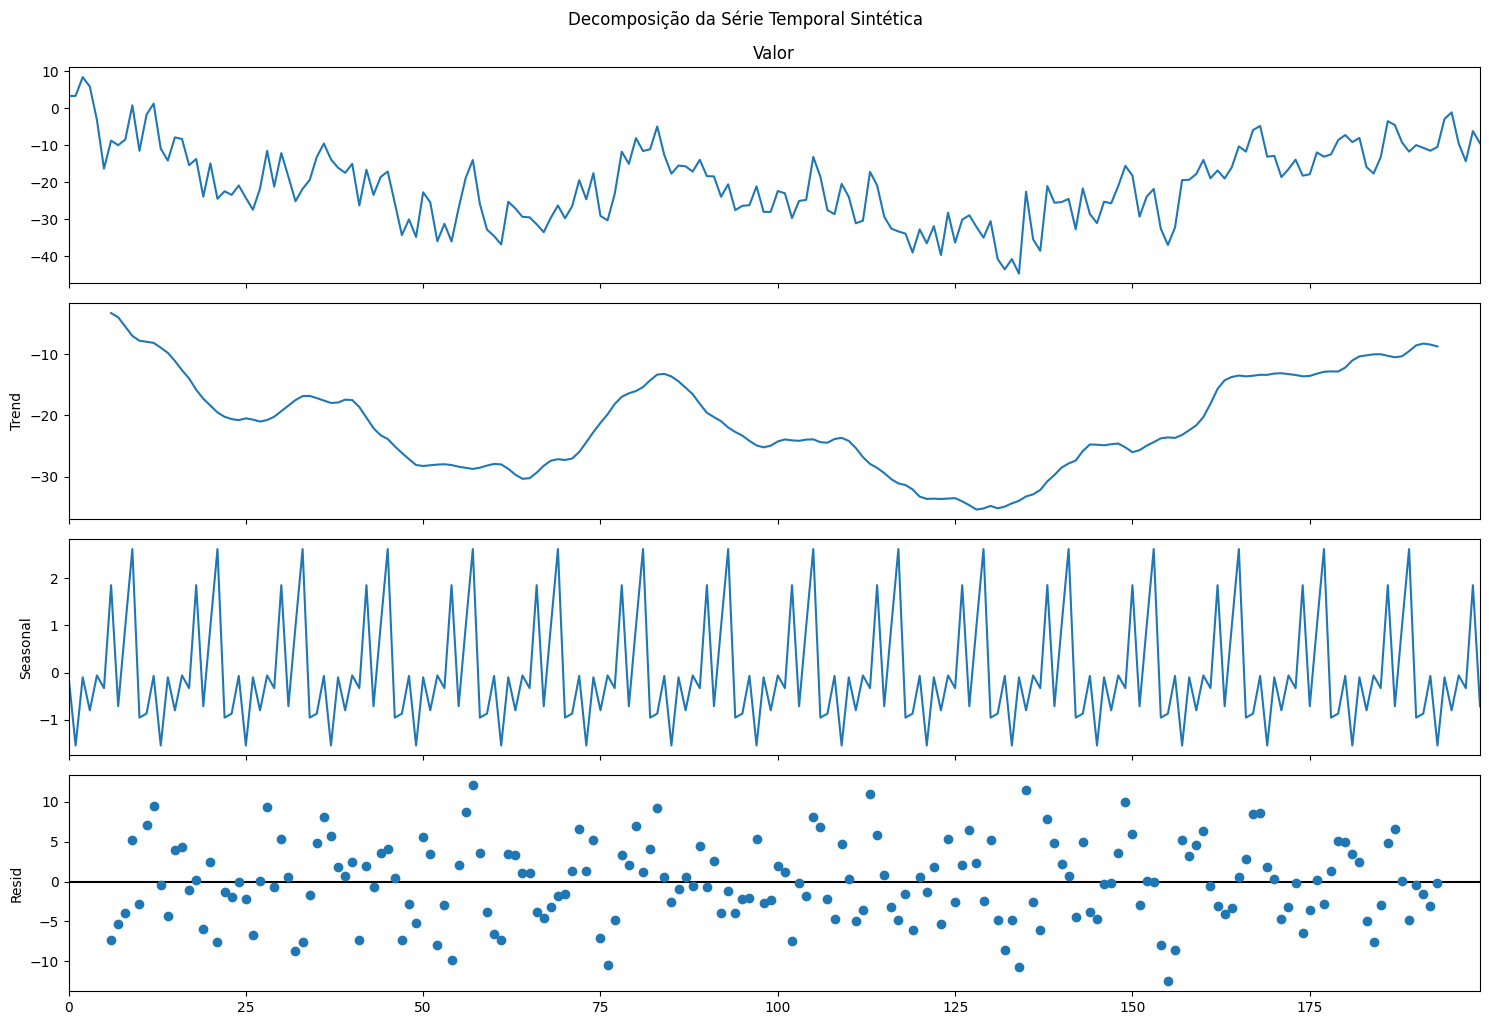

In [ ]:
# Realizando a decomposição da série sintética com sazonalidade menos evidente
# Usamos o modelo aditivo e o período sazonal que usamos para gerar a série (12)
decomposition_sazonalidade_menos_evidente = seasonal_decompose(df_random_series['Valor'], model='add',period=12)

# Plotar os componentes da decomposição
fig = decomposition_sazonalidade_menos_evidente.plot()
plt.suptitle('Decomposição da Série Temporal Sintética', y=1.02) # Adiciona um título geral
plt.show()

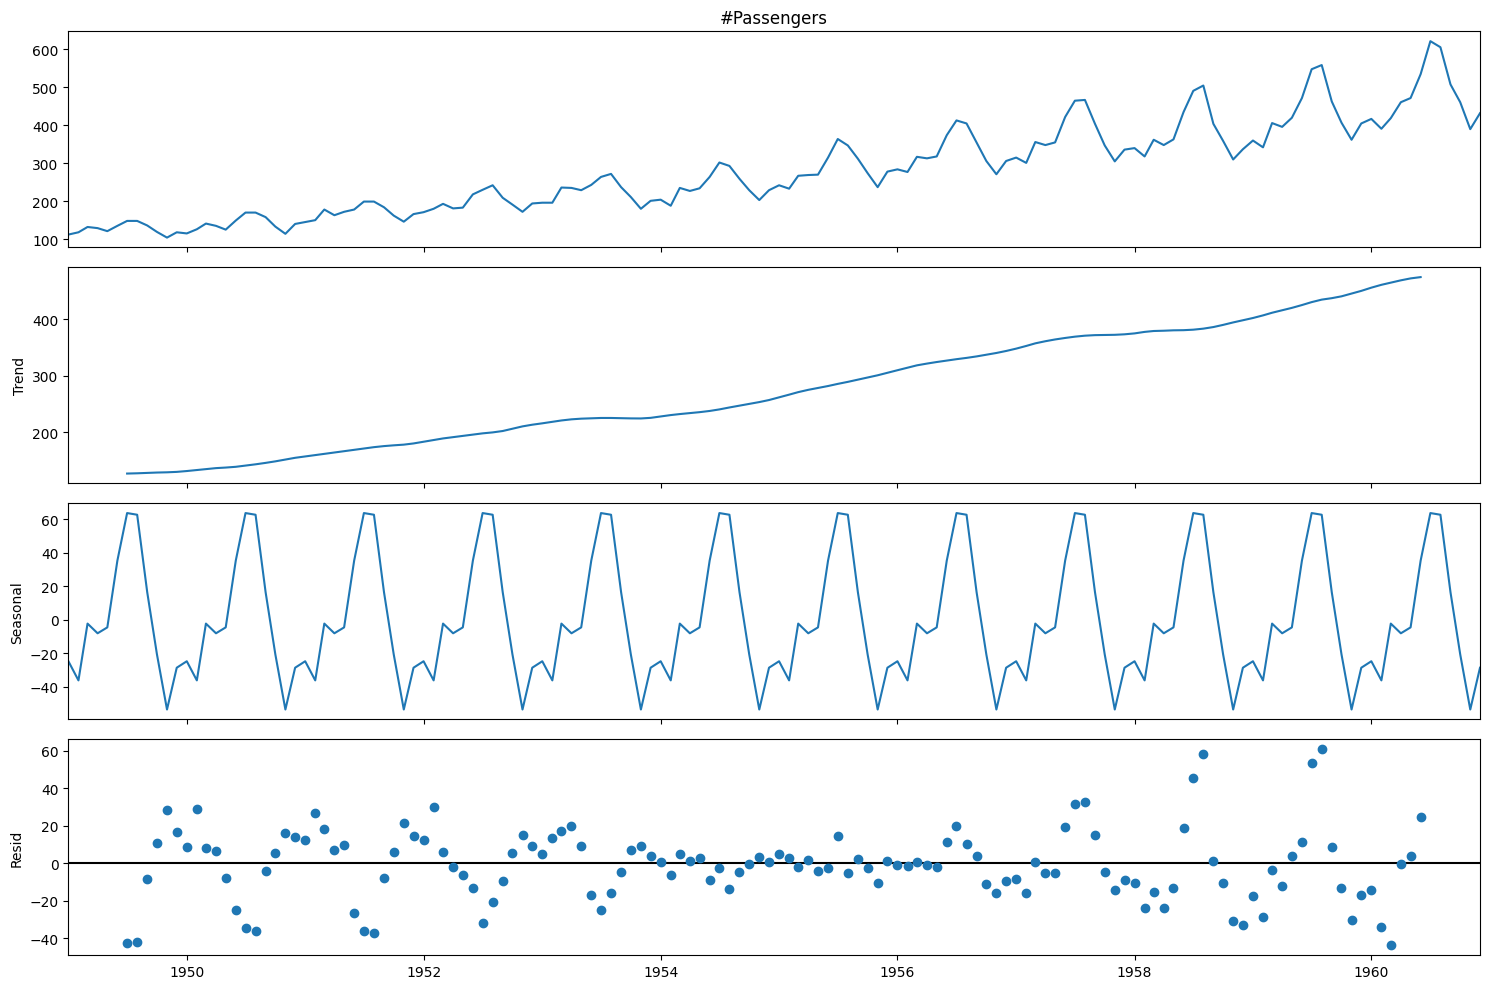

In [ ]:
decomposition = seasonal_decompose(df['#Passengers'],
                                   model='add')


# Plot the decomposed components (trend, seasonal, and residual)
fig = decomposition.plot()
plt.show()

# Informações adicionais de uma série. Explorando melhor a série.

In [ ]:
df2 = pd.read_csv("precipitacao_mensal.csv", index_col = "Data", parse_dates = True, sep = ";")
df2.head()

,Precipitação
Data,
1956-01-31,"113,7"
1956-02-29,109
1956-03-31,"112,1"
1956-04-30,"188,5"
1956-05-31,"249,6"


In [ ]:
#Transformar em float e substituir a vírgula por ponto.
df2 = df2.replace(',', '.', regex=True).astype(float)
df2

,Precipitação
Data,
1956-01-31,113.7
1956-02-29,109.0
1956-03-31,112.1
1956-04-30,188.5
1956-05-31,249.6
...,...
2023-08-31,144.1
2023-09-30,123.3
2023-10-31,363.0


In [ ]:
# Rename the 'Demand' column to 'y' in the DataFrame
df2 = df2.rename(columns = {'Precipitação': 'y'})
df2.head()

,y
Data,
1956-01-31,113.7
1956-02-29,109.0
1956-03-31,112.1
1956-04-30,188.5
1956-05-31,249.6


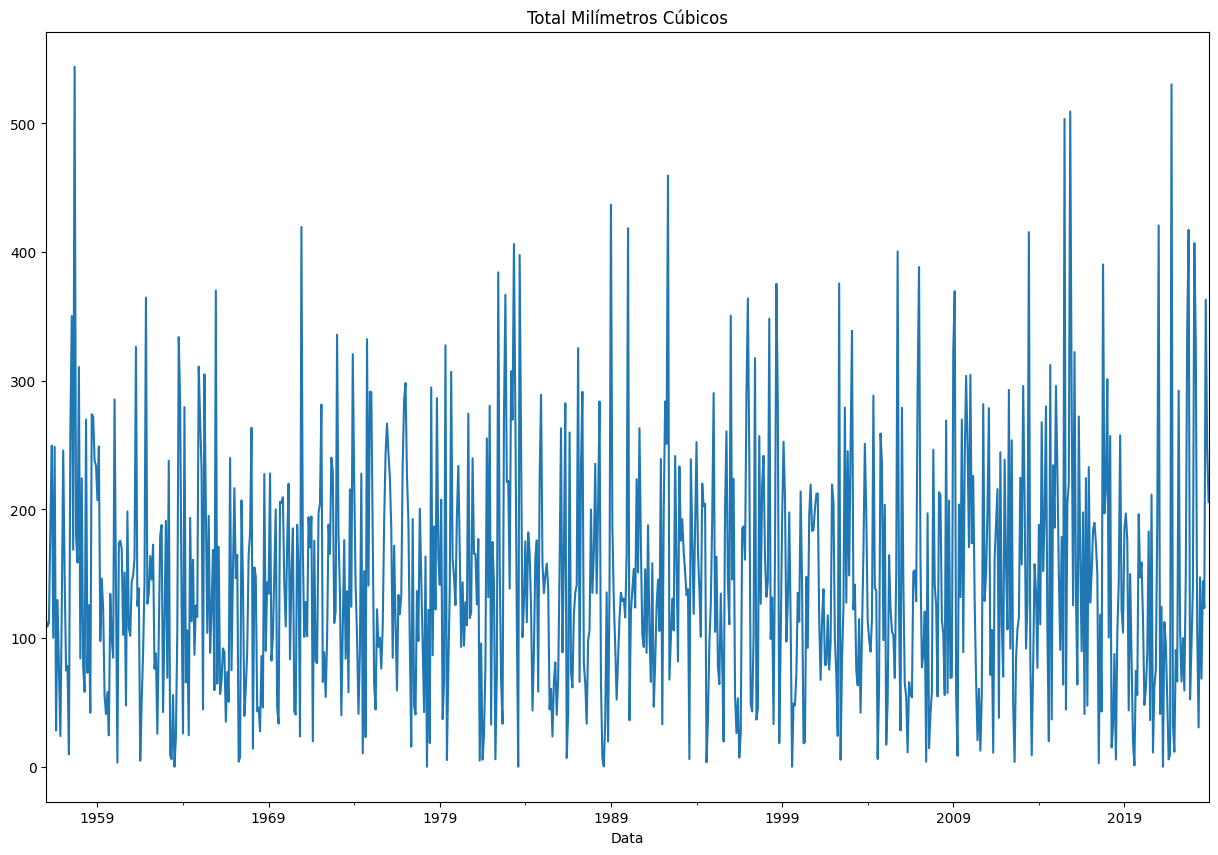

In [ ]:
df2['y'].plot(title = 'Total Milímetros Cúbicos')
plt.show()

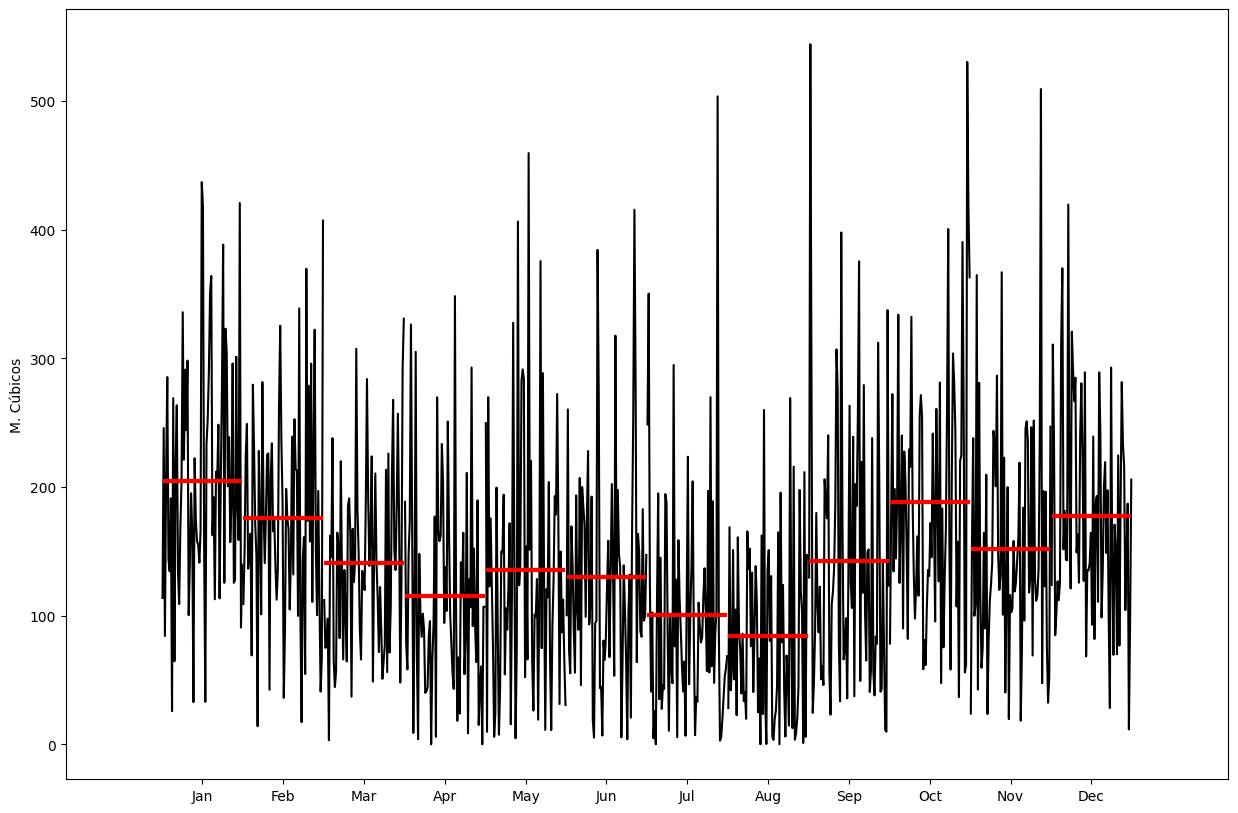

In [ ]:
# visualização da sazonalidade mensal
month_plot(df2['y'].resample('ME').mean(),
           ylabel = 'M. Cúbicos')
plt.show()

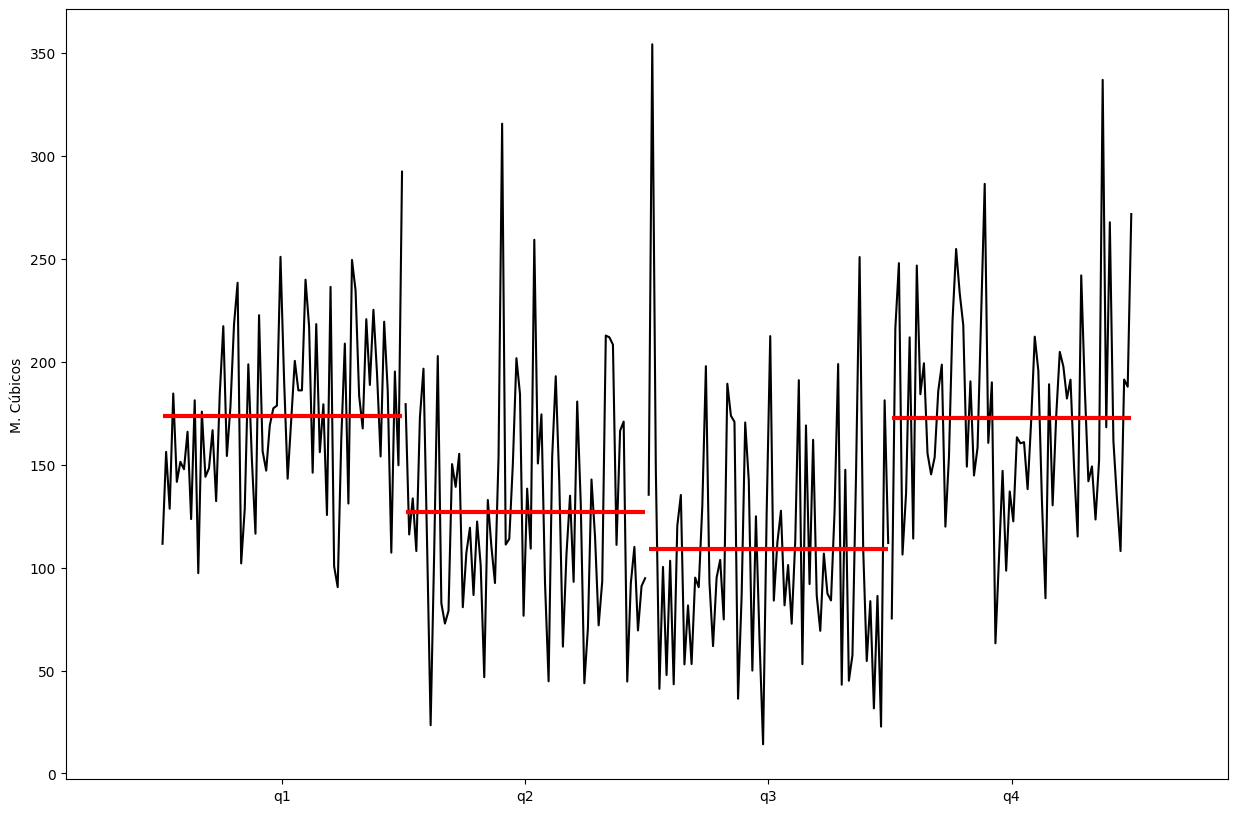

In [ ]:
# visualização da sazonalidade treimestral
quarter_plot(df2['y'].resample('QE').mean(),
           ylabel = 'M. Cúbicos')
plt.show()